In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [3]:
# 불러오기
df = pd.read_csv('Data/preprocessed_movies_data.csv')

In [4]:
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='Apple SD Gothic Neo')

### **페르소나**

- **이름**: Alex Kim
- **직업**: 영화 제작사 마케팅 팀장
- **목표**: 시장 트렌드를 분석하여 관객들이 원하는 영화 장르와 특성을 파악하고, 투자 대비 수익성이 높은 영화 제작 아이디어를 도출하고자 함.
- **관심사**:
    - 어떤 영화가 최근 트렌드에 부합하는지?
    - 흥행 성공 요인과 관련된 데이터 패턴 발견
    - 관객들이 선호하는 장르, 러닝타임, 배우 등 구체적인 요소 분석
    - 영화 제작 비용 대비 수익성을 극대화할 수 있는 전략

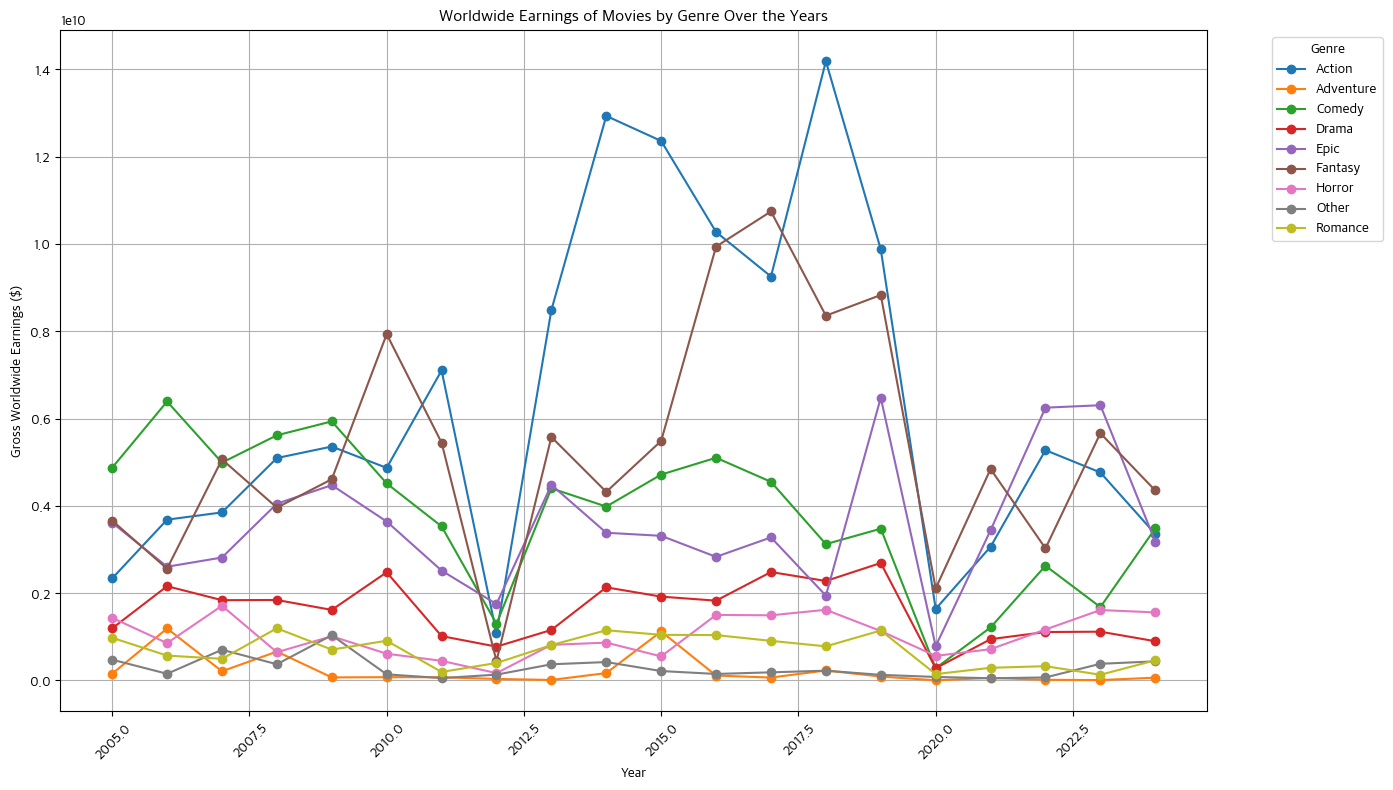

In [5]:
# 3.
genre_earnings = df.groupby(['Year', 'Category'])['grossWorldWide'].sum().reset_index()

# 모든 장르에 대해 시각화
plt.figure(figsize=(14, 8))  # 넓은 형태의 그림 크기 지정

# 각 장르에 대해 연도별 수익을 시각화
for genre in genre_earnings['Category'].unique():
    genre_data = genre_earnings[genre_earnings['Category'] == genre]
    plt.plot(genre_data['Year'], genre_data['grossWorldWide'], marker='o', label=genre)

plt.xlabel('Year')
plt.ylabel('Gross Worldwide Earnings ($)')
plt.title('Worldwide Earnings of Movies by Genre Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 오른쪽에 배치
plt.grid(True)
plt.xticks(rotation=45)  # 연도 표시가 겹치지 않도록 회전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

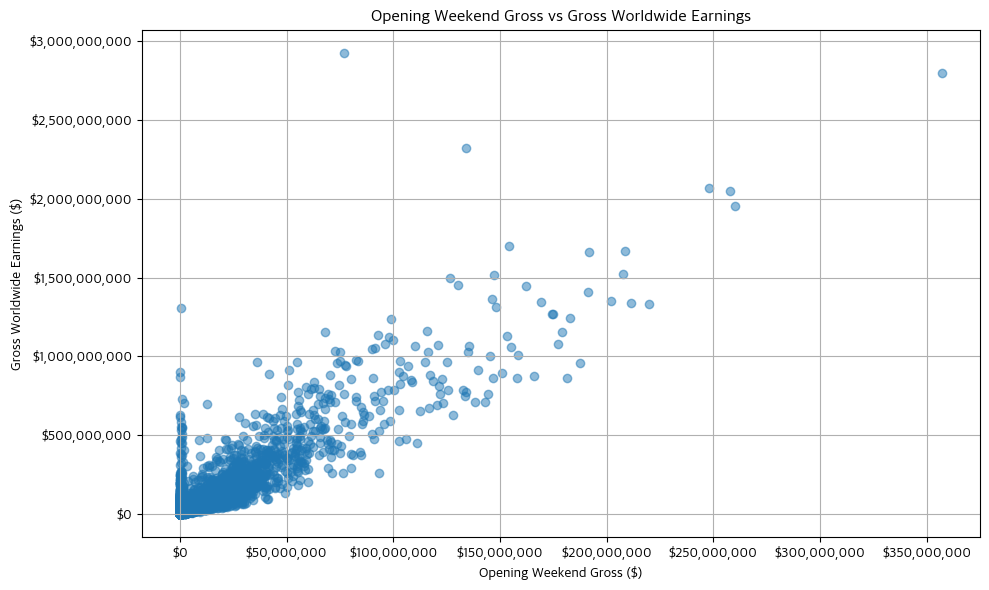

개봉 주 수익(Opening_weekend_Gross)이 전체 흥행(GrossWorldwide) 상관 관계 : 0.90


In [6]:
# 'opening_weekend_Gross'와 'grossWorldWide' 컬럼을 숫자형으로 변환
df['opening_weekend_Gross'] = pd.to_numeric(df['opening_weekend_Gross'], errors='coerce')

# 산점도 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['opening_weekend_Gross'], df['grossWorldWide'], alpha=0.5)

# 천 단위 구분 및 통화 기호 추가 함수
def currency(x, pos):
    return f"${x:,.0f}"

# X축과 Y축에 천 단위 구분과 통화 기호 적용
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# 축 레이블 및 제목 설정
plt.xlabel('Opening Weekend Gross ($)')
plt.ylabel('Gross Worldwide Earnings ($)')
plt.title('Opening Weekend Gross vs Gross Worldwide Earnings')

plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

# 'opening_weekend_Gross'와 'grossWorldWide'의 상관 계수 계산
opening_weekend_correlation = df['opening_weekend_Gross'].corr(df['grossWorldWide'])
print(f"개봉 주 수익(Opening_weekend_Gross)이 전체 흥행(GrossWorldwide) 상관 관계 : {opening_weekend_correlation:.2f}")


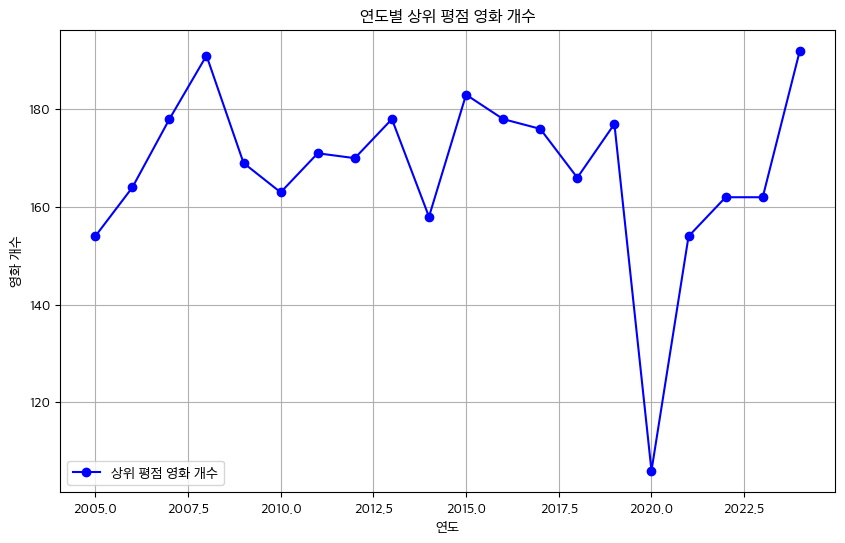

In [7]:
# IMDb 평점이 높은 영화만 필터링 (예: 평점 7.0 이상)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
top_rated_movies = df[df['Rating'] >= 7.0]

# 연도별 상위 평점 영화 개수 계산
top_rated_by_year = top_rated_movies.groupby('Year')['Title'].count()

# 꺾은선 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(top_rated_by_year.index, top_rated_by_year.values, marker='o', color='b', label='상위 평점 영화 개수')
plt.xlabel('연도')
plt.ylabel('영화 개수')
plt.title('연도별 상위 평점 영화 개수')
plt.legend()
plt.grid(True)
plt.show()

#### 영화 제작사 스토리 개발 팀장 (Story Development Manager)
**목표**:
- 흥행 가능성이 높은 영화 스토리를 기획하고 개발 방향성을 제시.
- 기존 흥행 데이터를 바탕으로 관객이 선호하는 스토리와 장르를 파악.
- 영화 시나리오의 독창성과 시장성을 균형 있게 고려하여 성공적인 프로젝트를 기획.





1. 장르별 수익성 및 평점 분석 "어떤 장르가 가장 높은 흥행성과와 평점을 기록하는가?"

/var/folders/qv/kf5vm6ln5k113k6v46_6ynn00000gn/T/ipykernel_5647/761748592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='Category', y='grossWorldWide', palette='viridis')
/var/folders/qv/kf5vm6ln5k113k6v46_6ynn00000gn/T/ipykernel_5647/761748592.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='Category', y='Rating', palette='coolwarm')


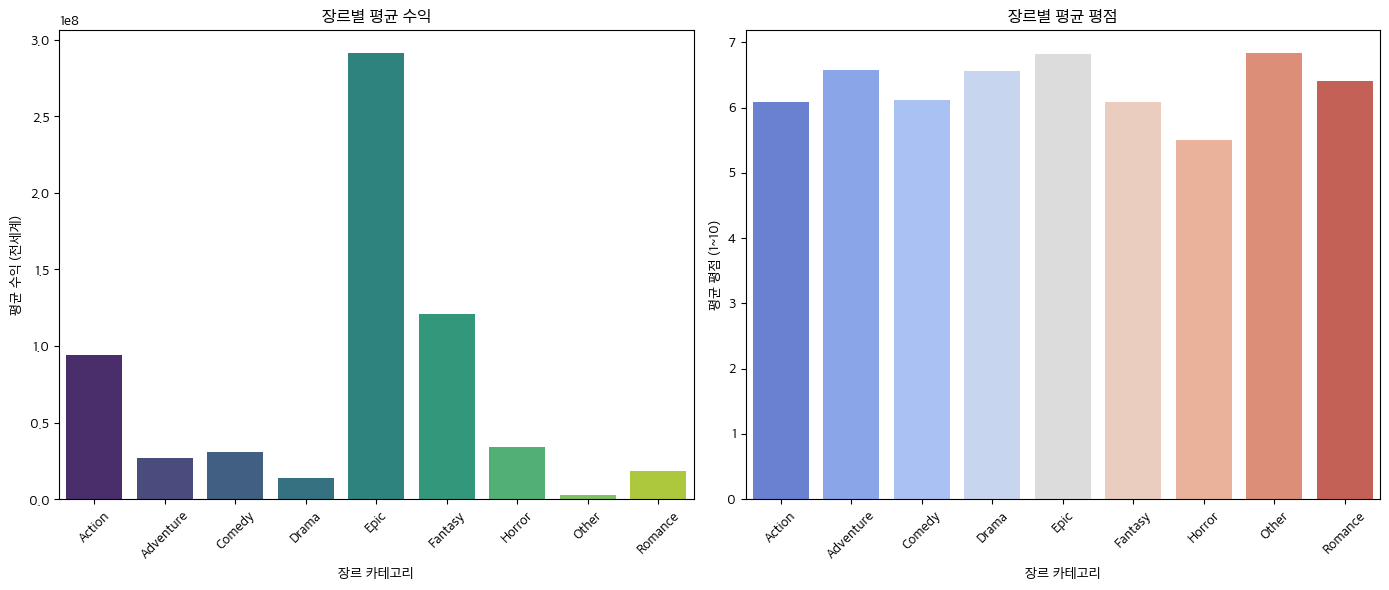

In [8]:
# Category와 grossWorldWide, Rating 데이터 활용
# 장르별 수익과 평점 분석
genre_analysis = df.groupby('Category').agg({
    'grossWorldWide' : 'mean',
    'Rating' : 'mean'
}).reset_index()

# 장르별 평균 수익 막대그래프
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=genre_analysis, x='Category', y='grossWorldWide', palette='viridis')
plt.title('장르별 평균 수익')
plt.xlabel('장르 카테고리') 
plt.ylabel('평균 수익 (전세계)') 
plt.xticks(rotation=45)

# 장르별 평균 평점 막대그래프
plt.subplot(1, 2, 2)
sns.barplot(data=genre_analysis, x='Category', y='Rating', palette='coolwarm')
plt.title('장르별 평균 평점')
plt.xlabel('장르 카테고리') 
plt.ylabel('평균 평점 (1~10)') 
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

2. 수상 이력과 흥행의 상관관계 분석 "수상 실적이 있는 영화들의 스토리적 특징과 흥행 패턴은?"

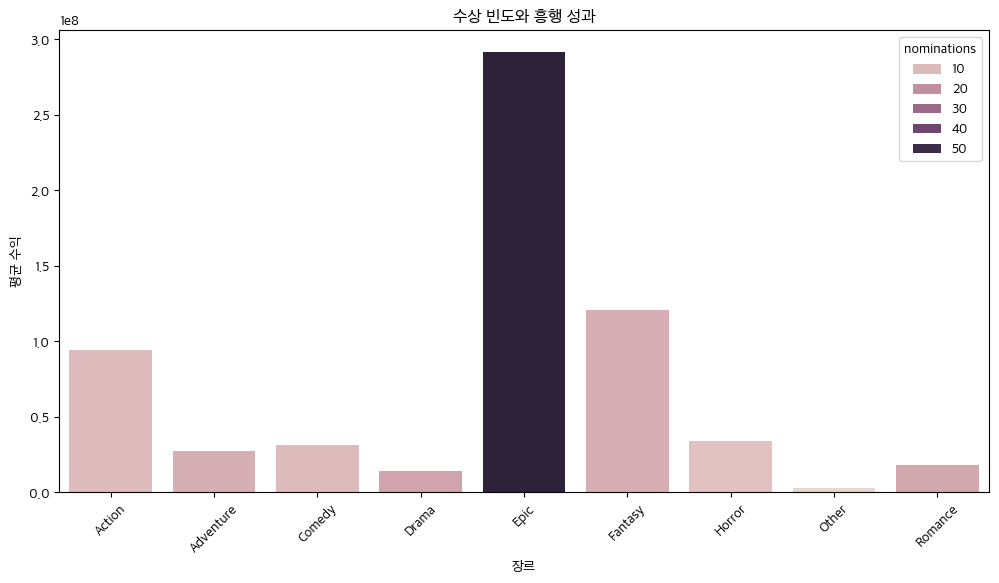

In [9]:

# 수상 여부에 따른 흥행성과 비교
# 장르별 수상 빈도 분석
# 시각화를 통한 수상작의 특징 패턴 도출
# 수상 여부 및 흥행 성과 비교
award_analysis = df.groupby('Category').agg({
    'nominations': 'mean',
    'grossWorldWide': 'mean'
}).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=award_analysis, x='Category', y='grossWorldWide', hue='nominations')
plt.title("수상 빈도와 흥행 성과")
plt.xlabel("장르")
plt.ylabel("평균 수익")
plt.xticks(rotation=45)
plt.show()



3. 평점-투표수 관계를 통한 관객 선호도 분석 "높은 평점과 많은 투표를 받은 영화들의 공통된 특징은?"

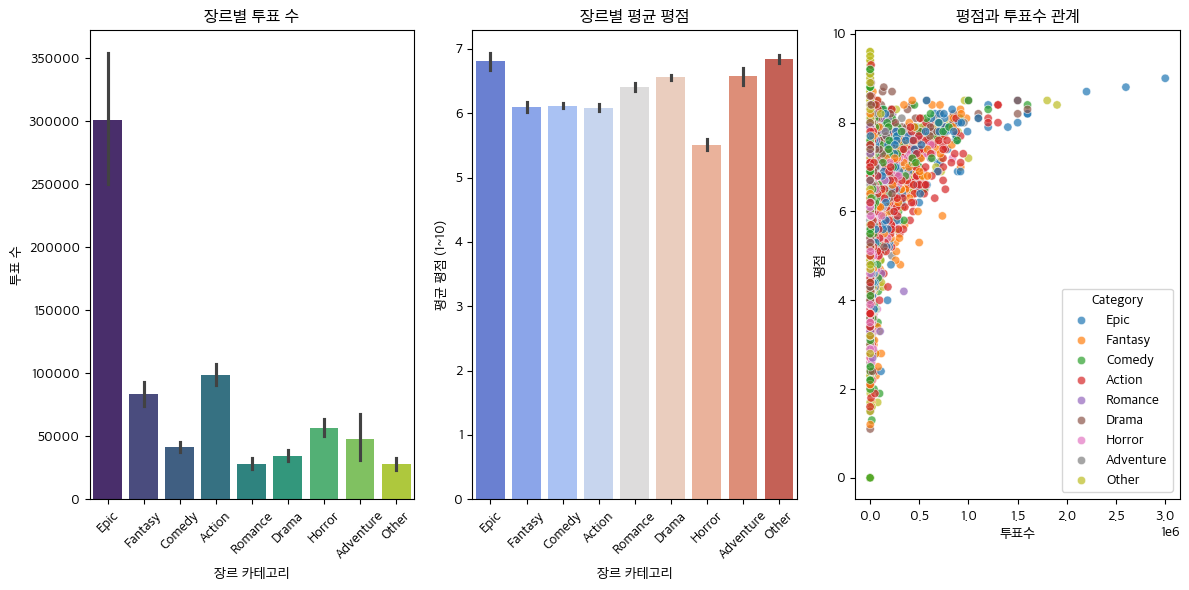

In [10]:
# 평점-투표수 관계 분석
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Votes', y='Rating', hue='Category', alpha=0.7)
plt.title("평점과 투표수 관계")
plt.xlabel("투표수")
plt.ylabel("평점")

# 장르별 투표 수 막대그래프
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Category', y='Votes', palette='viridis', hue='Category')
plt.title('장르별 투표 수')
plt.xlabel('장르 카테고리') 
plt.ylabel('투표 수') 
plt.xticks(rotation=45)

# 장르별 평균 평점 막대그래프
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Category', y='Rating', palette='coolwarm', hue='Category')
plt.title('장르별 평균 평점')
plt.xlabel('장르 카테고리') 
plt.ylabel('평균 평점 (1~10)') 
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()


## **페르소나 3: Sophia Jung**

- **직업**:영화 제작사 홍보/마케팅 팀장 (PR & Marketing Manager)

- **목표**:
    - 영화의 흥행 가능성을 높이기 위해 효과적인 홍보 및 마케팅 캠페인을 기획.
    - 데이터 기반으로 타겟 관객층을 분석하고, 맞춤형 마케팅 전략을 수립.
    - 영화 개봉 전후 온라인과 오프라인에서 관객 참여를 극대화.
- **관심사**:
    - 특정 관객층(연령, 성별, 지역)에 효과적인 마케팅 채널과 메시지 파악.
    - 영화 개봉 시점에 맞춘 트렌드 기반 홍보 전략 수립.
    - 영화 리뷰와 평점 데이터를 활용해 개봉 후 홍보 방향 조정.

**상관관계 분석**
- 예산(budget)과 수익(grossWorldWide, gross_US_canada)
- 등급(MPA)과 수익(grossWorldWide)
- 영화 평점(Rating)과 수익(grossWorldWide, opening_weekend_Gross)
- 장르(genres)와 수익(grossWorldWide)
- 배우(stars)와 수익(grossWorldWide)
- 국가(countries_origin)와 수익(grossWorldWide)
- 영화 개봉 연도(Year)와 수익(grossWorldWide)
- 촬영장소(filming_locations)와 수익(grossWorldWide)
- 상 수상 여부(nominations, oscars)와 수익(grossWorldWide)
- 상영 시간(Duration)과 흥행 수익(grossWorldWide)

### 1. 예산과 수익
- budget vs 전세계 수익
- budget vs 북미 수익

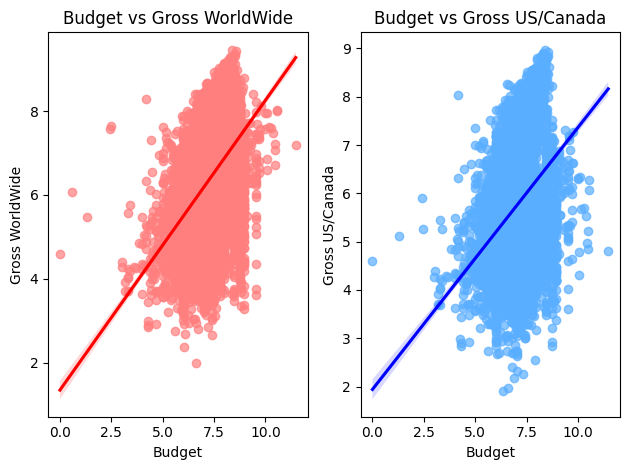

In [ ]:
bg_df = df[['budget', 'grossWorldWide', 'gross_US_Canada']]

# 0을 로그처리 x
# 두 데이터의 스케일을 맞춰주는 작업
bg_df = bg_df.replace(0, np.nan)
bg_df = np.log10(bg_df)

# 예산과 수익
# 예산과 전 세계 수익 간의 관계
# 회귀선: 전반적인 추세
plt.subplot(1, 2, 1)
sns.regplot(x="budget", y="grossWorldWide", data=bg_df, scatter_kws={"alpha": 0.7, "color": "#FF7E7E"}, line_kws={"color": "red"})
plt.title("Budget vs Gross WorldWide")
plt.xlabel("Budget")
plt.ylabel("Gross WorldWide")

# 예산과 북미(미국/캐나다)수익 간의 관계
# 회귀선: 전반적인 추세
plt.subplot(1, 2, 2)
sns.regplot(x="budget", y="gross_US_Canada", data=bg_df, scatter_kws={"alpha": 0.7, "color":"#5AAEFF"}, line_kws={"color": "blue"})
plt.title("Budget vs Gross US/Canada")
plt.xlabel("Budget")
plt.ylabel("Gross US/Canada")

# 그래프 출력
plt.tight_layout()
plt.show()

### 1. 예산과 수익
- budget vs 전세계 수익
- budget vs 북미 수익

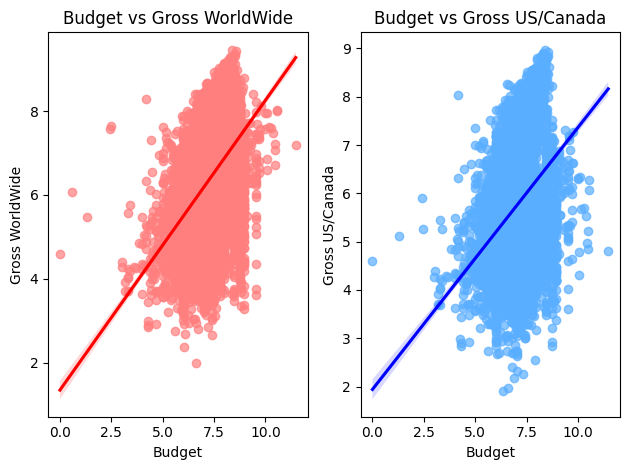

In [ ]:
bg_df = df[['budget', 'grossWorldWide', 'gross_US_Canada']]

# 0을 로그처리 x
# 두 데이터의 스케일을 맞춰주는 작업
bg_df = bg_df.replace(0, np.nan)
bg_df = np.log10(bg_df)

# 예산과 수익
# 예산과 전 세계 수익 간의 관계
# 회귀선: 전반적인 추세
plt.subplot(1, 2, 1)
sns.regplot(x="budget", y="grossWorldWide", data=bg_df, scatter_kws={"alpha": 0.7, "color": "#FF7E7E"}, line_kws={"color": "red"})
plt.title("Budget vs Gross WorldWide")
plt.xlabel("Budget")
plt.ylabel("Gross WorldWide")

# 예산과 북미(미국/캐나다)수익 간의 관계
# 회귀선: 전반적인 추세
plt.subplot(1, 2, 2)
sns.regplot(x="budget", y="gross_US_Canada", data=bg_df, scatter_kws={"alpha": 0.7, "color":"#5AAEFF"}, line_kws={"color": "blue"})
plt.title("Budget vs Gross US/Canada")
plt.xlabel("Budget")
plt.ylabel("Gross US/Canada")

# 그래프 출력
plt.tight_layout()
plt.show()

**종합 해석**
- 예산이 높아질수록 영화의 수익(둘 다)도 증가하는 경향이 뚜렷
- Insight: 북미 시장보다 전 세계 수익이 예산과의 관계에서 조금 더 밀접한 양상을 보임
- 회귀선에서 크게 벗어나는 일부 데이터는 예외적인 사례로, 예산 대비 높은 수익을 거둠 or 낮은 수익을 기록한 경우

### 2. 등급과 수익
- MPA vs grossWorldWide

| **등급**         | **설명**                                                                 |
|------------------|--------------------------------------------------------------------------|
| **PG-13**        | 13세 이상 관람 가능. 일부 부적절한 내용이 있을 수 있음.                   |
| **PG**           | 전체 관람가. 어린이와 가족을 대상으로 함.                               |
| **R**            | 17세 이하 제한. 폭력, 성적 내용, 부적절한 언어 포함.                    |
| **Not Rated**    | 등급 미정. 등급을 받지 않은 영화.                                        |
| **G**            | 전체 관람가. 모든 연령대가 관람할 수 있음.                               |
| **TV-MA**        | TV에서 성인용 콘텐츠. 강한 성적 내용, 폭력, 부적절한 언어가 포함될 수 있음. |
| **TV-14**        | 14세 이상 관람 가능. 일부 성인용 내용이 포함될 수 있음.                   |
| **TV-PG**        | 전체 관람가. 일부 부적절한 내용이 있을 수 있음.                           |
| **Unrated**      | 등급 미부여. 공식적인 등급이 없음.                                        |
| **TV-Y7**        | 7세 이상 관람 가능. 어린이 대상, 일부 공포 또는 미성숙한 내용이 있을 수 있음. |
| **NC-17**        | 17세 이하 관람 불가. 성적인 내용이 매우 강하거나 폭력이 극단적일 수 있음.   |
| **13+**          | 13세 이상 관람 가능. 일부 내용이 불쾌하거나 적합하지 않을 수 있음.          |
| **18+**          | 18세 이상 관람 가능. 성인용 영화나 강한 폭력, 성적 내용이 포함됨.           |
| **TV-G**         | 전체 관람가. 어린이를 위한 TV 프로그램.                                  |
| **MA-17**        | 17세 이상 관람 불가. 영화나 프로그램에 강한 성적 내용, 폭력 포함.          |
| **Approved**     | 예전 영화 등급 시스템에서 사용되던 등급. 모든 연령이 관람 가능.              |
| **16+**          | 16세 이상 관람 가능. 일부 내용이 부적합할 수 있음.                        |
| **M**            | 13세 이상의 관람이 가능하며, 일부 성적인 내용과 폭력이 포함될 수 있음.      |
| **TV-Y**         | 7세 이하 어린이를 위한 TV 프로그램.                                      |
| **TV-Y7-FV**     | 7세 이상 관람 가능, 강한 공포적 내용이 포함될 수 있음.                      |


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


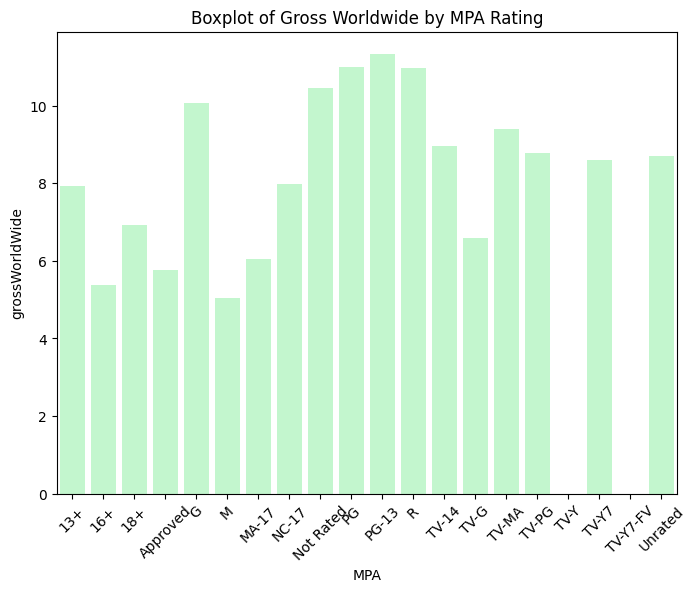

In [ ]:
group_budget = df[['grossWorldWide', 'MPA']]
group_budget = group_budget.groupby('MPA')['grossWorldWide'].sum().reset_index()
group_budget['grossWorldWide'] = np.log10(group_budget['grossWorldWide'])

plt.figure(figsize=(8, 6))
sns.barplot(x='MPA', y='grossWorldWide', data=group_budget, color='#baffc9')
plt.xticks(rotation=45)
plt.title('Boxplot of Gross Worldwide by MPA Rating')
plt.show()

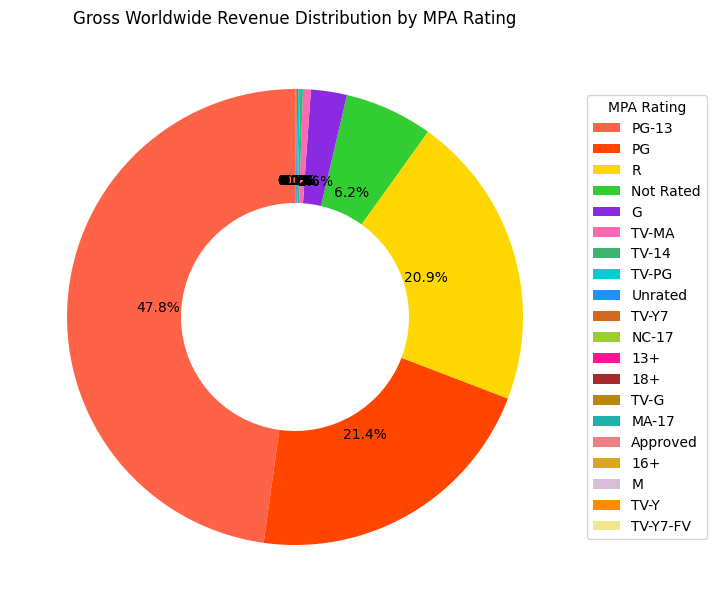

In [ ]:
group_budget = df[['grossWorldWide', 'MPA']]
group_budget = group_budget.groupby('MPA')['grossWorldWide'].sum().reset_index()

# 비율 계산
group_budget['percentage'] = group_budget['grossWorldWide'] / group_budget['grossWorldWide'].sum() * 100
group_budget = group_budget.sort_values(by='percentage', ascending=False).reset_index(drop=True)

colors = [
    '#FF6347', '#FF4500', '#FFD700', '#32CD32', '#8A2BE2', '#FF69B4', '#3CB371', '#00CED1', '#1E90FF', '#D2691E',
    '#9ACD32', '#FF1493', '#A52A2A', '#B8860B', '#20B2AA', '#F08080', '#DAA520', '#D8BFD8', '#FF8C00', '#F0E68C'
]

# 도넛 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(group_budget['percentage'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.5}, colors=colors)
plt.tight_layout()
plt.legend(group_budget['MPA'], title='MPA Rating', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Gross Worldwide Revenue Distribution by MPA Rating')
# 표시
plt.show()

In [ ]:
group_budget

,MPA,grossWorldWide,percentage
0,PG-13,2.192542e+11,47.805644
1,PG,9.802856e+10,21.373903
2,R,9.590428e+10,20.910731
3,Not Rated,2.864988e+10,6.246748
4,G,1.169769e+10,2.550535
5,TV-MA,2.534814e+09,0.552685
6,TV-14,8.845445e+08,0.192864
7,TV-PG,5.962917e+08,0.130014
8,Unrated,4.990899e+08,0.108820
9,TV-Y7,3.942762e+08,0.085967


**종합해석**
- 18세 이상의 연령제한 영화가 가장 많은 수익을 차지할거라는 예상과 달리, PG-13, PG 등의 가족이 함께보는 영화가 전국적으로 수입이 가장 높은 것을 확인 할 수 있었다.


### 3.영화 평점(Rating)과 수익(grossWorldWide, opening_weekend_Gross)
- Rating vs grossWorldWide
- Rating vs opening_weekend_Gross

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3125863952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating_bin'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3125863952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

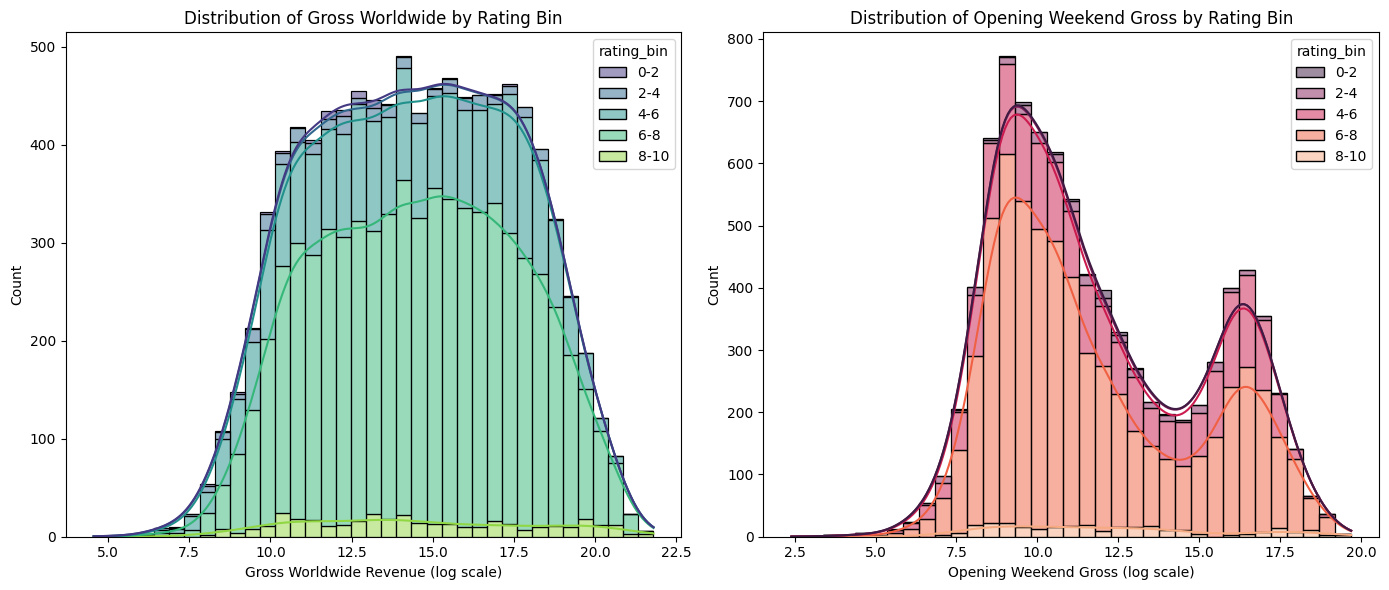

In [ ]:
rating_df = df[['Title','Rating', 'grossWorldWide', 'opening_weekend_Gross']]

bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
rating_df['rating_bin'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)

rating_df['grossWorldWide'] = np.log(rating_df['grossWorldWide'])
rating_df['opening_weekend_Gross'] = np.log(rating_df['opening_weekend_Gross'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 서브플롯: grossWorldWide
sns.histplot(data=rating_df, x='grossWorldWide', hue='rating_bin', kde=True, multiple="stack", palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Gross Worldwide by Rating Bin')
axes[0].set_xlabel('Gross Worldwide Revenue (log scale)')
axes[0].set_ylabel('Count')

# 두 번째 서브플롯: opening_weekend_Gross
sns.histplot(data=rating_df, x='opening_weekend_Gross', hue='rating_bin', kde=True, multiple="stack", palette='rocket', ax=axes[1])
axes[1].set_title('Distribution of Opening Weekend Gross by Rating Bin')
axes[1].set_xlabel('Opening Weekend Gross (log scale)')
axes[1].set_ylabel('Count')

# 그래프 보여주기
plt.tight_layout()
plt.show()


**종합 해석**
- 전세계 총 수입: 10~15 사이에 집중분포 -> 중간 수준의 수입을 올린다
- 등급이 높아질수록 높은 수입을 올린 영화의 비율이 올라감
- 주말에 개봉한 영화일 경우: 중간수준의 수입을 올리고 있음
- 영화의 평점과 수입간에 어느정도 상관관계가 있지만 절대적인 관계는 아니며, 낮은 등급의 영화 중에서도 예상 외의 큰 성공을 거두는 경우가 있다

In [ ]:
plus_analysis = df[['Title', 'opening_weekend_Gross', 'grossWorldWide', 'Rating']]

**[추가 분석]**
- 평점 별 / 총 수입별 영화 분포도
- 평점 별 / 주말 개봉 수입별 영화 분포도

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\1560457167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_analysis['log_grossWorldWide'] = np.log(plus_analysis['grossWorldWide'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\1560457167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

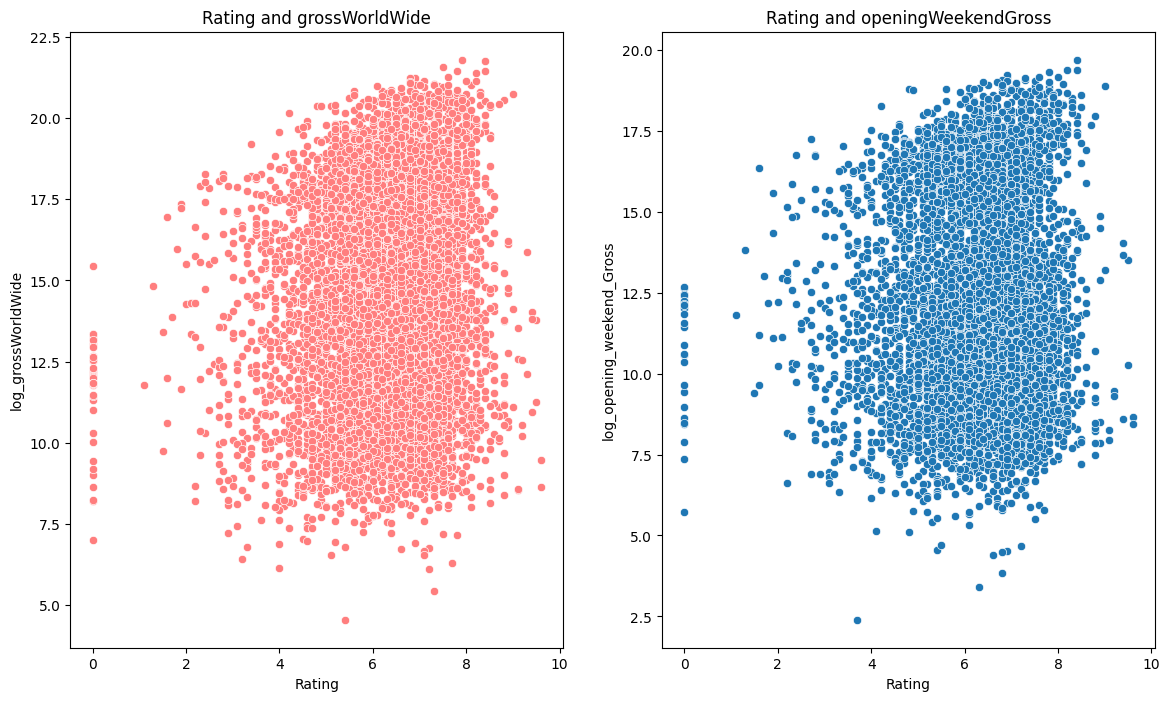

In [ ]:
# 평점 별 영화 분포
plus_analysis['log_grossWorldWide'] = np.log(plus_analysis['grossWorldWide'])
plus_analysis['log_opening_weekend_Gross'] = np.log(plus_analysis['opening_weekend_Gross'])

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.scatterplot(x='Rating',y='log_grossWorldWide', data=plus_analysis, ax=axes[0], c='#FF7E7E')
axes[0].set_title('Rating and grossWorldWide')

sns.scatterplot(x='Rating', y='log_opening_weekend_Gross', data=plus_analysis, ax=axes[1])
axes[1].set_title('Rating and openingWeekendGross')

# for i, row in plus_analysis.iterrows():
#     plt.text(row['Rating'], row['grossWorldWide'], row['Title'], fontsize=8)
plt.show()

너무 많으니까.. 평점별 1개씩만 영화 추려서 보여주기
- 평점별 수익 top1 데이터만

**이때, 평점별 데이터는 0~9까지 10점으로 통일하고, 각 단계에서 가장 높은 (opening Weekend Gross)주말 개봉 기준 수익, 전세계 수익으로 데이터를 가져온다**
- 그린 이유 : 평점과 수익의 상관관계에서 가장 많은 수익을 차지하는 영화가 주말 개봉과 세계 총 수익에서 변동사항이 있을지 궁금

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\152700746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_analysis['Rating_num'] = (plus_analysis['Rating'] // 1).astype(int)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\152700746.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data_holiday = plus_analysis.groupby('Rating_num').apply(lambda x: x.nlargest(1, 'opening_weekend_Gross'))[['Title', 'Rating_num', 'opening_weekend_G

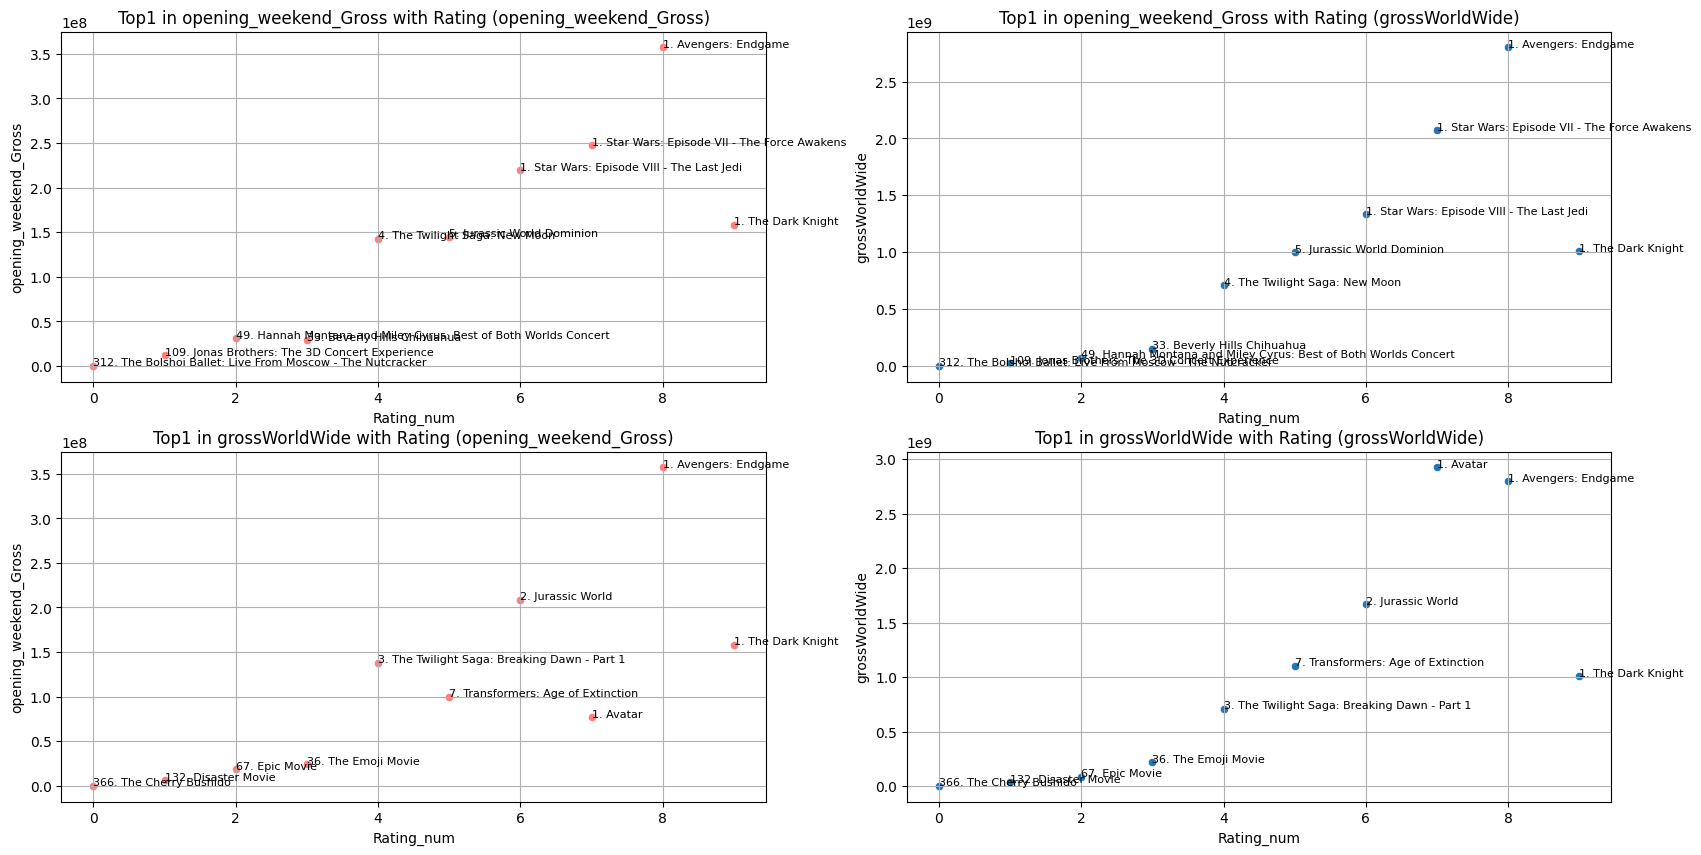

In [ ]:
plus_analysis['Rating_num'] = (plus_analysis['Rating'] // 1).astype(int)
filtered_data_holiday = plus_analysis.groupby('Rating_num').apply(lambda x: x.nlargest(1, 'opening_weekend_Gross'))[['Title', 'Rating_num', 'opening_weekend_Gross', 'grossWorldWide']].reset_index(drop=True)
filtered_data_world_wide = plus_analysis.groupby('Rating_num').apply(lambda x: x.nlargest(1, 'grossWorldWide'))[['Title', 'Rating_num', 'opening_weekend_Gross', 'grossWorldWide']].reset_index(drop=True)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.scatterplot(x='Rating_num',y='opening_weekend_Gross', data=filtered_data_holiday, ax=axes[0][0], c='#FF7E7E')
axes[0][0].set_title('Top1 in opening_weekend_Gross with Rating (opening_weekend_Gross)')

sns.scatterplot(x='Rating_num', y='grossWorldWide', data=filtered_data_holiday, ax=axes[0][1])
axes[0][1].set_title('Top1 in opening_weekend_Gross with Rating (grossWorldWide)')

sns.scatterplot(x='Rating_num', y='opening_weekend_Gross', data=filtered_data_world_wide, ax=axes[1][0], c='#FF7E7E')
axes[1][0].set_title('Top1 in grossWorldWide with Rating (opening_weekend_Gross)')

sns.scatterplot(x='Rating_num', y='grossWorldWide', data=filtered_data_world_wide, ax=axes[1][1])
axes[1][1].set_title('Top1 in grossWorldWide with Rating (grossWorldWide)')


for i, row in filtered_data_holiday.iterrows():
    axes[0][0].text(row['Rating_num'], row['opening_weekend_Gross'], row['Title'], fontsize=8)
    axes[0][1].text(row['Rating_num'], row['grossWorldWide'], row['Title'], fontsize=8)

for i, row in filtered_data_world_wide.iterrows():
    axes[1][0].text(row['Rating_num'], row['opening_weekend_Gross'], row['Title'], fontsize=8)
    axes[1][1].text(row['Rating_num'], row['grossWorldWide'], row['Title'], fontsize=8)

axes[0][0].grid()
axes[0][1].grid()
axes[1][0].grid()
axes[1][1].grid()
    
plt.show()

**[추가 분석]**
- Q: 주말 개봉 수익이 있는 영화는 과연 전세계 총 수입이 얼마나 높을까? (주말 개봉 수익이 0인것 제외)

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


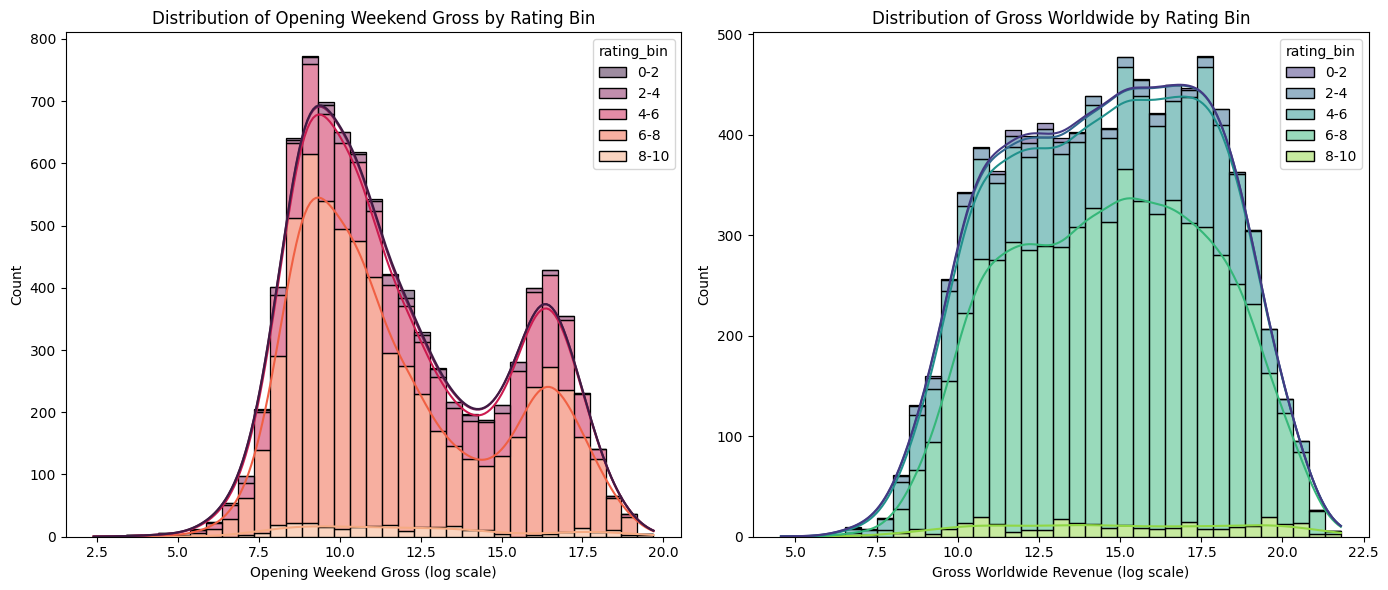

In [ ]:
plus_analysis = plus_analysis[plus_analysis['opening_weekend_Gross'] > 0]

bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
plus_analysis['rating_bin'] = pd.cut(plus_analysis['Rating'], bins=bins, labels=labels, right=False)

plus_analysis['grossWorldWide'] = np.log(plus_analysis['grossWorldWide'])
plus_analysis['opening_weekend_Gross'] = np.log(plus_analysis['opening_weekend_Gross'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=plus_analysis, x='opening_weekend_Gross', hue='rating_bin', kde=True, multiple="stack", palette='rocket', ax=axes[0])
axes[0].set_title('Distribution of Opening Weekend Gross by Rating Bin')
axes[0].set_xlabel('Opening Weekend Gross (log scale)')
axes[0].set_ylabel('Count')

sns.histplot(data=plus_analysis, x='grossWorldWide', hue='rating_bin', kde=True, multiple="stack", palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Gross Worldwide by Rating Bin')
axes[1].set_xlabel('Gross Worldwide Revenue (log scale)')
axes[1].set_ylabel('Count')

# 그래프 보여주기
plt.tight_layout()
plt.show()


### 4. 상 수상 여부와 수익

- oscar and nominations

- oscars: n개 부문 수상
- nominations: n개 부문에 후보로 오름

In [ ]:
df.columns

Index(['Title', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget',
       'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross',
       'directors', 'writers', 'stars', 'genres', 'countries_origin',
       'filming_locations', 'production_companies', 'Languages', 'nominations',
       'oscars', 'Category'],
      dtype='object')

In [ ]:
gg_df = df[['Title', 'Category', 'oscars', 'nominations', 'grossWorldWide']]

(가설)수상이 많을수록 총수익이 높을것이다.

oscars, nominations 상관관계 분석
- oscars와 nominations는 서로 양의 상관관계를 가지고 있다

               oscars  nominations
oscars       1.000000     0.446532
nominations  0.446532     1.000000


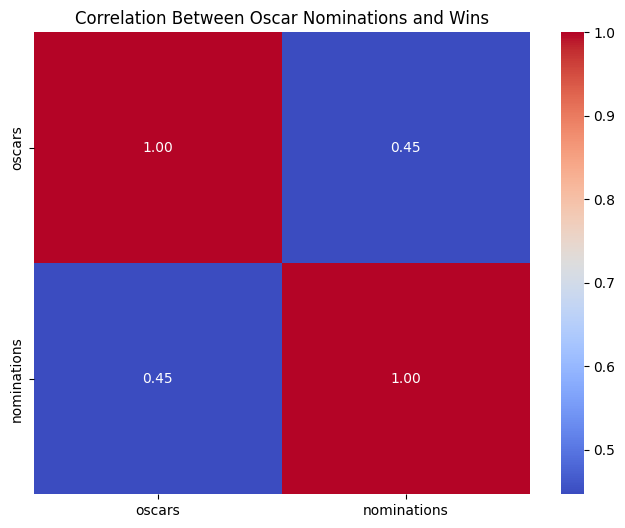

In [ ]:
# 상관계수 계산
correlation = gg_df[['oscars', 'nominations']].corr()
print(correlation)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Oscar Nominations and Wins')
plt.show()

1. oscars, nominations 분포도

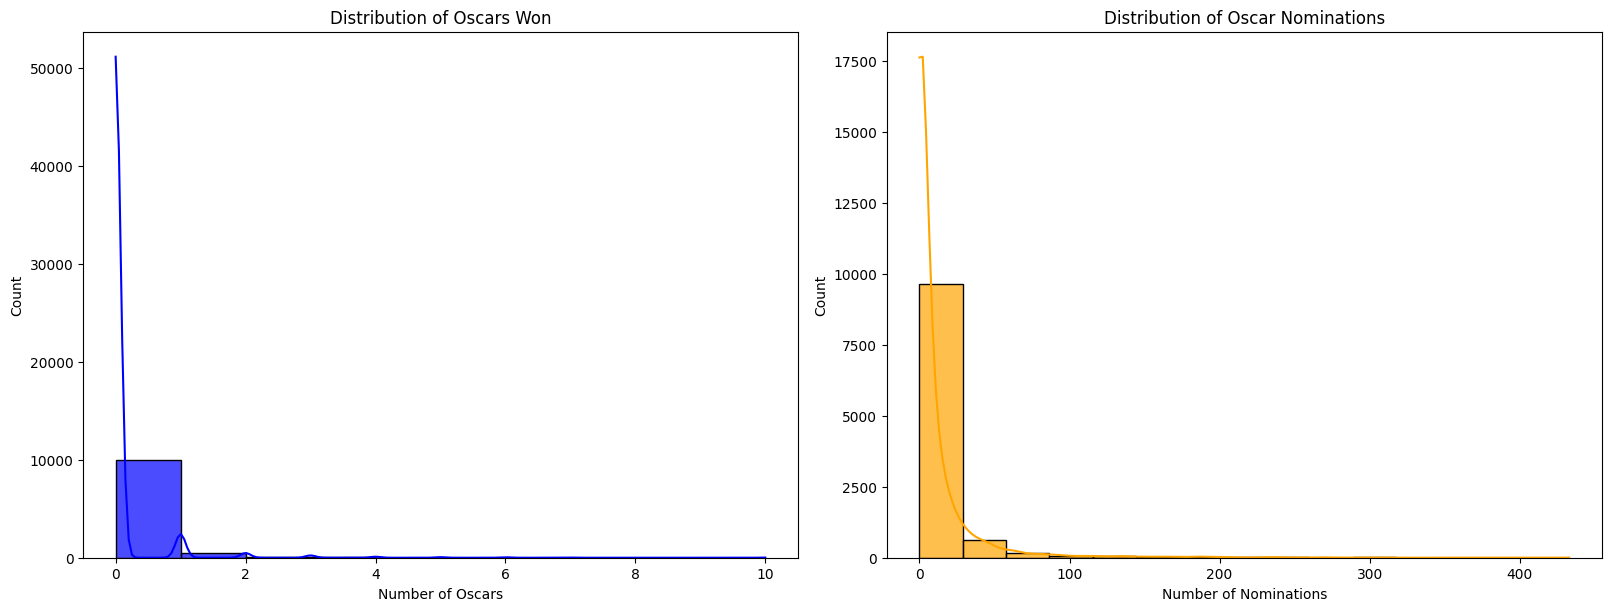

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# 첫 번째 히스토그램: Oscars 분포
sns.histplot(data=gg_df, x='oscars', bins=10, kde=True, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Oscars Won')
axes[0].set_xlabel('Number of Oscars')
axes[0].set_ylabel('Count')

# 두 번째 히스토그램: Nominations 분포
sns.histplot(data=gg_df, x='nominations', bins=15, kde=True, color='orange', alpha=0.7, ax=axes[1])
axes[1].set_title('Distribution of Oscar Nominations')
axes[1].set_xlabel('Number of Nominations')
axes[1].set_ylabel('Count')

# 그래프 표시
plt.show()

**종합해석**
- 아카데미상은 영화 산업에서 매우 중요한 역할을 하지만, 수상은 매우 어렵고 경쟁적임
- 대부분의 영화는 소수의 아카데미상을 수상하거나 노미네이트되며, 극소수의 영화만이 다수의 상을 받음
- 실제로 수상하는게 노미네이트 되는 것보다 실제로 훨씬 어렵다는 것을 확인할 수 있음

2. oscars와 WorldWide Gross / Nominations와 WorldWide Gross
- **oscars & WorldWide Gross**: 수상부문이 많을수록 평균 전 세계 수익이 증가하는 경향 확인 -> 아카데미 수상이 영화의 흥행에 긍정적인 영향을 미칠 수 있다.
- **nominations & WorldWide Gross**: 후보 지명 횟수가 많아질수록 평균 전 세계 수익이 증가하는 패턴이 보일 수 있다 -> 후보 지명이 영화의 주목도를 높여 흥행에 영향을 줄 가능성을 시사

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3559623653.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=oscar_gross, x='oscars', y='grossWorldWide', palette='viridis', ax=axes[0])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3559623653.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nomination_gross, x='nominations', y='grossWorldWide', palette='rocket', ax=axes[1])


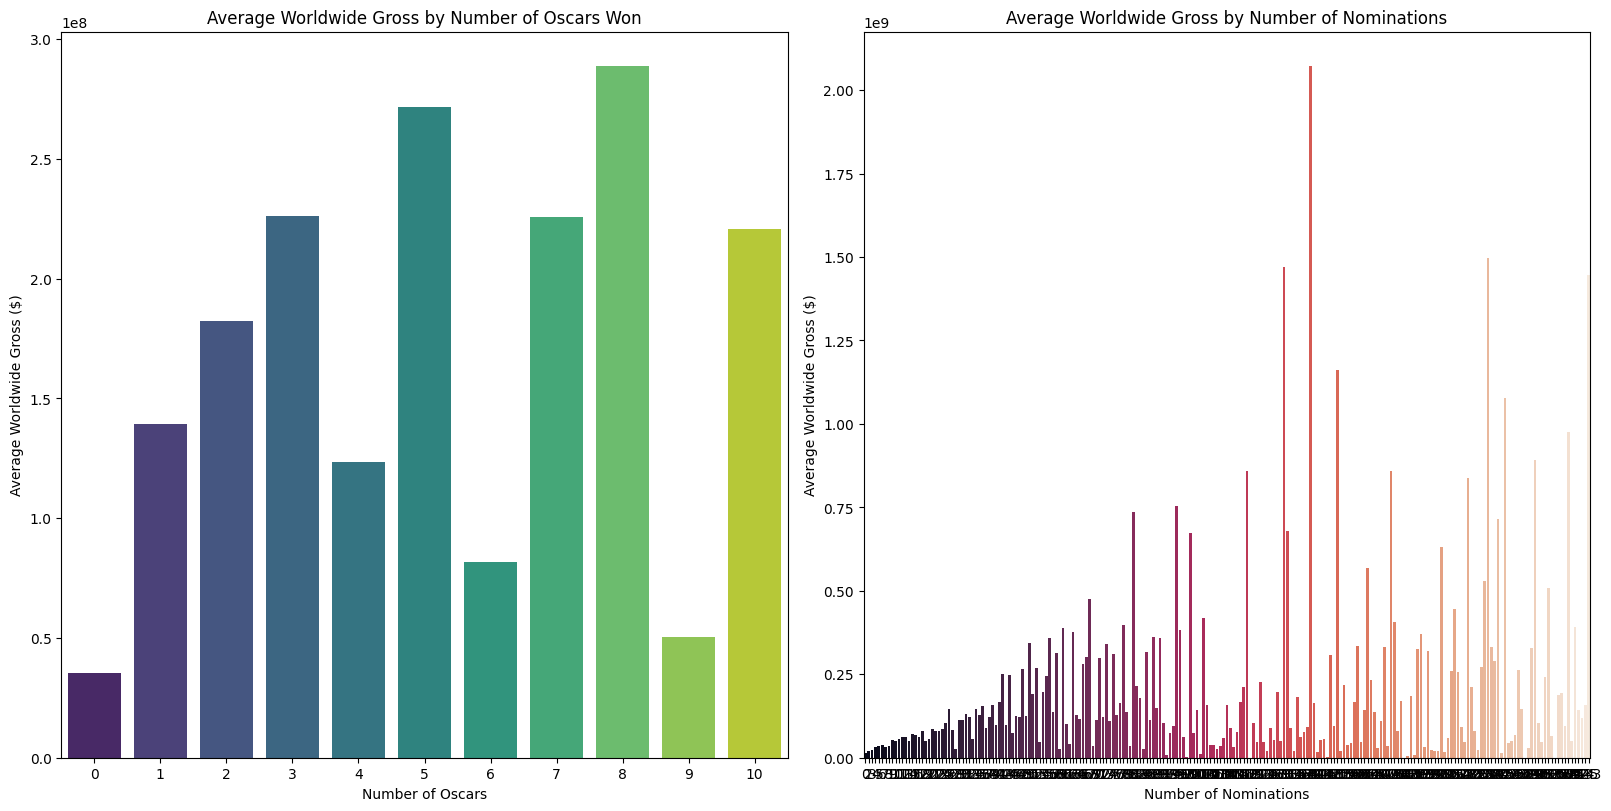

In [ ]:
# Oscars별 평균 전 세계 수익
oscar_gross = gg_df.groupby('oscars')['grossWorldWide'].mean().reset_index()
# Nominations별 평균 전 세계 수익
nomination_gross = gg_df.groupby('nominations')['grossWorldWide'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)
sns.barplot(data=oscar_gross, x='oscars', y='grossWorldWide', palette='viridis', ax=axes[0])
axes[0].set_title('Average Worldwide Gross by Number of Oscars Won')
axes[0].set_xlabel('Number of Oscars')
axes[0].set_ylabel('Average Worldwide Gross ($)')

sns.barplot(data=nomination_gross, x='nominations', y='grossWorldWide', palette='rocket', ax=axes[1])
axes[1].set_title('Average Worldwide Gross by Number of Nominations')
axes[1].set_xlabel('Number of Nominations')
axes[1].set_ylabel('Average Worldwide Gross ($)')

plt.show()

**종합 해석**
1. 오스카 수상 횟수와 전 세계 총 수입의 관계
- x축: 오스카상 n 부문 수상
- y축: 전세계 총 수입


-> 오스카 수상은 영화의 흥행에 긍정적인 요인이다.


-> 오스카 수상 0 부문 수상과 비교했을 때, 1부문이라도 수상한 영화의 총수입이 더 높음

2. 수상 후보 횟수와 전세계 총 수입의 관계
- x축: 오스카 후보 횟수
- y축: 전세계 총 수입
-> 수상 횟수 그래프보다 분산이 더 큼

= 노미네이트 횟수가 많다고 해서 반드시 많은 수입을 올리는 것이 아니고, 노미네이트 횟수가 매우 많은 영화 중에서도 전 세계 총 수입이 상대적으로 낮은 경우 존재

-> 수상 후보에 오르는 것은 영화의 흥행에 긍정적인 영향을 미치는 것으로 해석될 수 있지만, 수상만큼 강력한 상관관계는 없다.
수상 후보는 영화의 질을 인정받는 다는 점에서 중요하지만 흥행 성공을 보장하지는 않는다.

3. oscar, nomination을 고려한 산점도

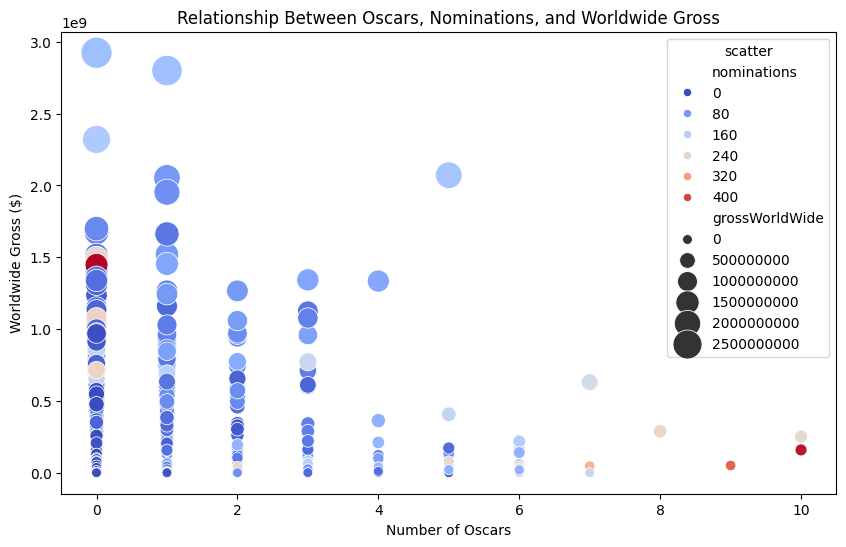

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gg_df, x='oscars', y='grossWorldWide', hue='nominations', size='grossWorldWide', palette='coolwarm', sizes=(50, 500))
plt.title('Relationship Between Oscars, Nominations, and Worldwide Gross')
plt.xlabel('Number of Oscars')
plt.ylabel('Worldwide Gross ($)')
plt.legend(title='scatter')
plt.show()

**종합해석**
각 점: 하나의 영화  
점의 크기: 전 세계 수입  
- 클수록 전 세계 수입이 높음
색깔: 노미네이션 횟수  

흠..생각보다 수상을 하지 않은 영화중에서도 수입이 높은 경우가 있습니다....

**[추가 분석]**  
- oscar 수상을 다수 한 영화 장르(Category 이용) 분석  

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\2502704617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_oscars, x='oscars', y='Category', palette=custom_palette)


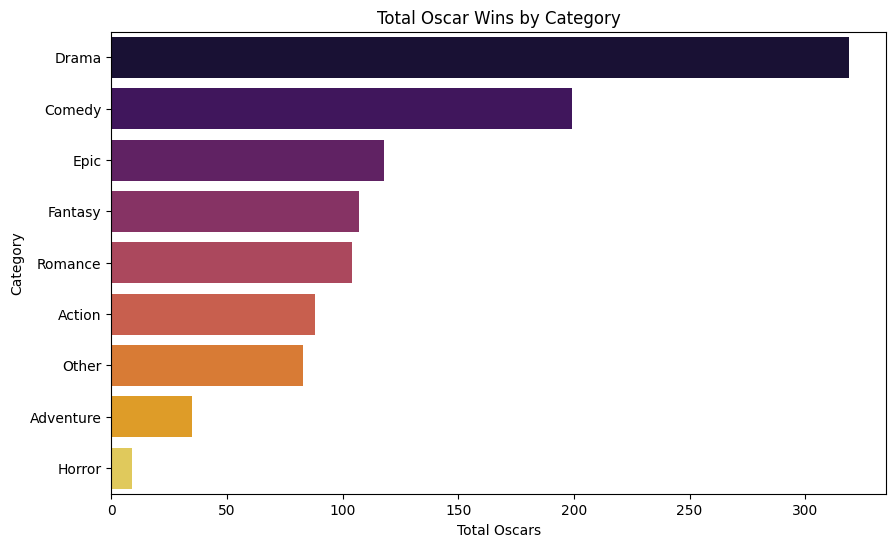

In [ ]:
# 데이터를 그룹화하여 각 Category별 Oscars 수상의 합 계산
category_oscars = df.groupby('Category')['oscars'].sum().reset_index()

# Oscars 수상의 내림차순으로 정렬
category_oscars = category_oscars.sort_values(by='oscars', ascending=False)
custom_palette = sns.color_palette("inferno", len(category_oscars))

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=category_oscars, x='oscars', y='Category', palette=custom_palette)
plt.title('Total Oscar Wins by Category')
plt.xlabel('Total Oscars')
plt.ylabel('Category')
plt.show()

**Drama**에서 oscars 수상작이 많습니다.

Drama에서 가장 많이 oscars 많이 수상한 영화 Top5 (데이터 프레임 확인)

In [ ]:
drama_top5 = gg_df[gg_df['Category'] == 'Drama']
drama_top5 = drama_top5.sort_values(by='oscars', ascending=False).head(5).reset_index()
drama_top5.drop(columns=['index'], inplace=True)
drama_top5

,Title,Category,oscars,nominations,grossWorldWide
0,17. American Hustle,Drama,10,227,251171807.0
1,13. True Grit,Drama,10,169,252278285.0
2,58. The Fabelmans,Drama,7,297,45620703.0
3,87. Tár,Drama,6,274,29048571.0
4,120. 127 Hours,Drama,6,150,60738797.0


**[추가분석2]**
- grossWorldWide(총 세계 수입)이 가장 많은 장르

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\2389591078.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_money, x='grossWorldWide', y='Category', palette=custom_palette)


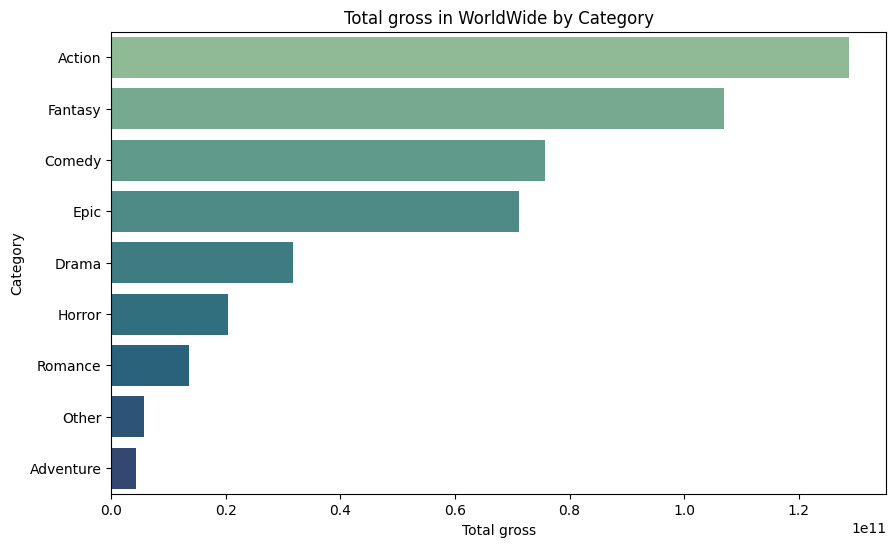

In [ ]:
# 데이터를 그룹화하여 각 Category별 총 세계 수입의 합 계산
category_money = df.groupby('Category')['grossWorldWide'].sum().reset_index()

# Oscars 수상의 내림차순으로 정렬
category_money = category_money.sort_values(by='grossWorldWide', ascending=False)
custom_palette = sns.color_palette("crest", len(category_money)) # cubehelix

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=category_money, x='grossWorldWide', y='Category', palette=custom_palette)
plt.title('Total gross in WorldWide by Category')
plt.xlabel('Total gross')
plt.ylabel('Category')
plt.show()

**종합 해석**
- 예산이 높아질수록 영화의 수익(둘 다)도 증가하는 경향이 뚜렷
- Insight: 북미 시장보다 전 세계 수익이 예산과의 관계에서 조금 더 밀접한 양상을 보임
- 회귀선에서 크게 벗어나는 일부 데이터는 예외적인 사례로, 예산 대비 높은 수익을 거둠 or 낮은 수익을 기록한 경우

### 2. 등급과 수익
- MPA vs grossWorldWide

| **등급**         | **설명**                                                                 |
|------------------|--------------------------------------------------------------------------|
| **PG-13**        | 13세 이상 관람 가능. 일부 부적절한 내용이 있을 수 있음.                   |
| **PG**           | 전체 관람가. 어린이와 가족을 대상으로 함.                               |
| **R**            | 17세 이하 제한. 폭력, 성적 내용, 부적절한 언어 포함.                    |
| **Not Rated**    | 등급 미정. 등급을 받지 않은 영화.                                        |
| **G**            | 전체 관람가. 모든 연령대가 관람할 수 있음.                               |
| **TV-MA**        | TV에서 성인용 콘텐츠. 강한 성적 내용, 폭력, 부적절한 언어가 포함될 수 있음. |
| **TV-14**        | 14세 이상 관람 가능. 일부 성인용 내용이 포함될 수 있음.                   |
| **TV-PG**        | 전체 관람가. 일부 부적절한 내용이 있을 수 있음.                           |
| **Unrated**      | 등급 미부여. 공식적인 등급이 없음.                                        |
| **TV-Y7**        | 7세 이상 관람 가능. 어린이 대상, 일부 공포 또는 미성숙한 내용이 있을 수 있음. |
| **NC-17**        | 17세 이하 관람 불가. 성적인 내용이 매우 강하거나 폭력이 극단적일 수 있음.   |
| **13+**          | 13세 이상 관람 가능. 일부 내용이 불쾌하거나 적합하지 않을 수 있음.          |
| **18+**          | 18세 이상 관람 가능. 성인용 영화나 강한 폭력, 성적 내용이 포함됨.           |
| **TV-G**         | 전체 관람가. 어린이를 위한 TV 프로그램.                                  |
| **MA-17**        | 17세 이상 관람 불가. 영화나 프로그램에 강한 성적 내용, 폭력 포함.          |
| **Approved**     | 예전 영화 등급 시스템에서 사용되던 등급. 모든 연령이 관람 가능.              |
| **16+**          | 16세 이상 관람 가능. 일부 내용이 부적합할 수 있음.                        |
| **M**            | 13세 이상의 관람이 가능하며, 일부 성적인 내용과 폭력이 포함될 수 있음.      |
| **TV-Y**         | 7세 이하 어린이를 위한 TV 프로그램.                                      |
| **TV-Y7-FV**     | 7세 이상 관람 가능, 강한 공포적 내용이 포함될 수 있음.                      |


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


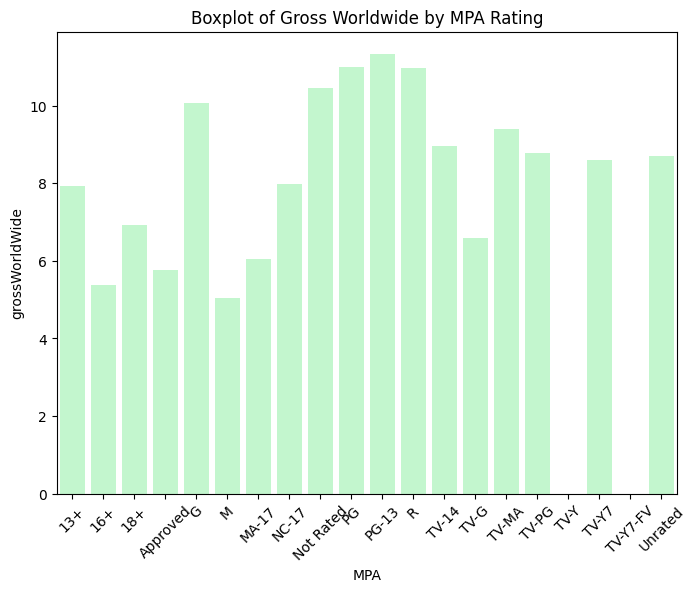

In [ ]:
group_budget = df[['grossWorldWide', 'MPA']]
group_budget = group_budget.groupby('MPA')['grossWorldWide'].sum().reset_index()
group_budget['grossWorldWide'] = np.log10(group_budget['grossWorldWide'])

plt.figure(figsize=(8, 6))
sns.barplot(x='MPA', y='grossWorldWide', data=group_budget, color='#baffc9')
plt.xticks(rotation=45)
plt.title('Boxplot of Gross Worldwide by MPA Rating')
plt.show()

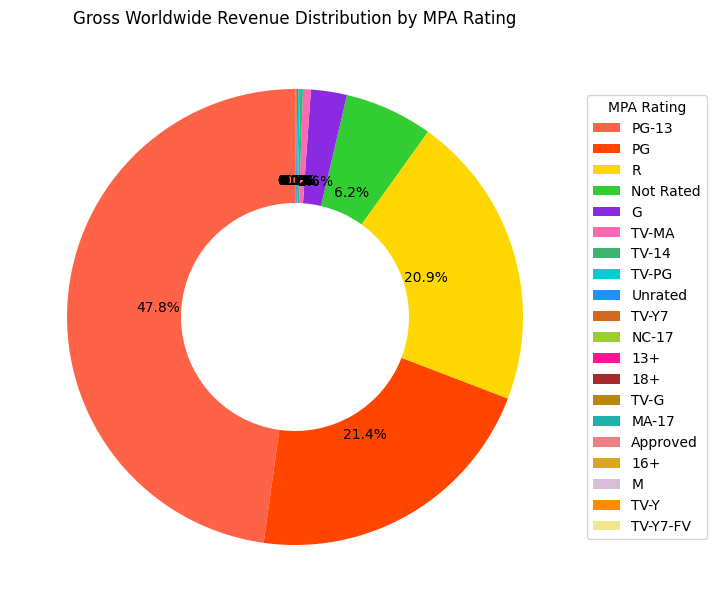

In [ ]:
group_budget = df[['grossWorldWide', 'MPA']]
group_budget = group_budget.groupby('MPA')['grossWorldWide'].sum().reset_index()

# 비율 계산
group_budget['percentage'] = group_budget['grossWorldWide'] / group_budget['grossWorldWide'].sum() * 100
group_budget = group_budget.sort_values(by='percentage', ascending=False).reset_index(drop=True)

colors = [
    '#FF6347', '#FF4500', '#FFD700', '#32CD32', '#8A2BE2', '#FF69B4', '#3CB371', '#00CED1', '#1E90FF', '#D2691E',
    '#9ACD32', '#FF1493', '#A52A2A', '#B8860B', '#20B2AA', '#F08080', '#DAA520', '#D8BFD8', '#FF8C00', '#F0E68C'
]

# 도넛 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(group_budget['percentage'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.5}, colors=colors)
plt.tight_layout()
plt.legend(group_budget['MPA'], title='MPA Rating', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Gross Worldwide Revenue Distribution by MPA Rating')
# 표시
plt.show()

In [ ]:
group_budget

,MPA,grossWorldWide,percentage
0,PG-13,2.192542e+11,47.805644
1,PG,9.802856e+10,21.373903
2,R,9.590428e+10,20.910731
3,Not Rated,2.864988e+10,6.246748
4,G,1.169769e+10,2.550535
5,TV-MA,2.534814e+09,0.552685
6,TV-14,8.845445e+08,0.192864
7,TV-PG,5.962917e+08,0.130014
8,Unrated,4.990899e+08,0.108820
9,TV-Y7,3.942762e+08,0.085967


**종합해석**
- 18세 이상의 연령제한 영화가 가장 많은 수익을 차지할거라는 예상과 달리, PG-13, PG 등의 가족이 함께보는 영화가 전국적으로 수입이 가장 높은 것을 확인 할 수 있었다.


### 3.영화 평점(Rating)과 수익(grossWorldWide, opening_weekend_Gross)
- Rating vs grossWorldWide
- Rating vs opening_weekend_Gross

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3125863952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating_bin'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3125863952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

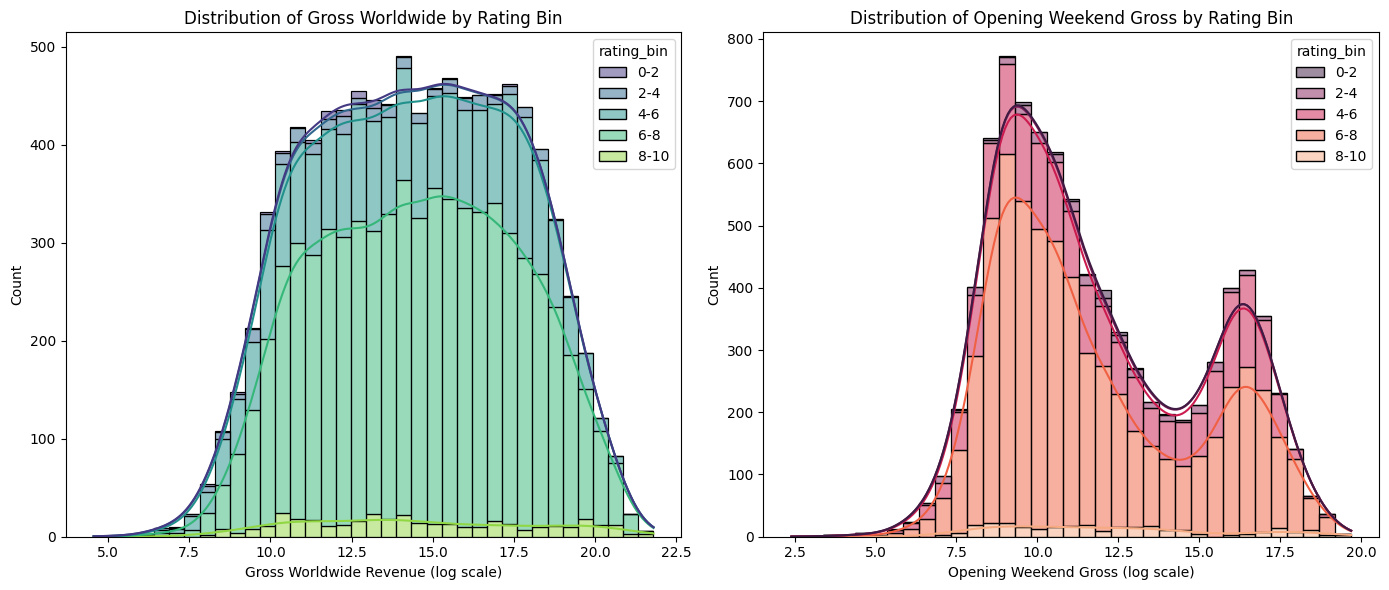

In [ ]:
rating_df = df[['Title','Rating', 'grossWorldWide', 'opening_weekend_Gross']]

bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
rating_df['rating_bin'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)

rating_df['grossWorldWide'] = np.log(rating_df['grossWorldWide'])
rating_df['opening_weekend_Gross'] = np.log(rating_df['opening_weekend_Gross'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 서브플롯: grossWorldWide
sns.histplot(data=rating_df, x='grossWorldWide', hue='rating_bin', kde=True, multiple="stack", palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Gross Worldwide by Rating Bin')
axes[0].set_xlabel('Gross Worldwide Revenue (log scale)')
axes[0].set_ylabel('Count')

# 두 번째 서브플롯: opening_weekend_Gross
sns.histplot(data=rating_df, x='opening_weekend_Gross', hue='rating_bin', kde=True, multiple="stack", palette='rocket', ax=axes[1])
axes[1].set_title('Distribution of Opening Weekend Gross by Rating Bin')
axes[1].set_xlabel('Opening Weekend Gross (log scale)')
axes[1].set_ylabel('Count')

# 그래프 보여주기
plt.tight_layout()
plt.show()


**종합 해석**
- 전세계 총 수입: 10~15 사이에 집중분포 -> 중간 수준의 수입을 올린다
- 등급이 높아질수록 높은 수입을 올린 영화의 비율이 올라감
- 주말에 개봉한 영화일 경우: 중간수준의 수입을 올리고 있음
- 영화의 평점과 수입간에 어느정도 상관관계가 있지만 절대적인 관계는 아니며, 낮은 등급의 영화 중에서도 예상 외의 큰 성공을 거두는 경우가 있다

In [ ]:
plus_analysis = df[['Title', 'opening_weekend_Gross', 'grossWorldWide', 'Rating']]

**[추가 분석]**
- 평점 별 / 총 수입별 영화 분포도
- 평점 별 / 주말 개봉 수입별 영화 분포도

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\1560457167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_analysis['log_grossWorldWide'] = np.log(plus_analysis['grossWorldWide'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\1560457167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

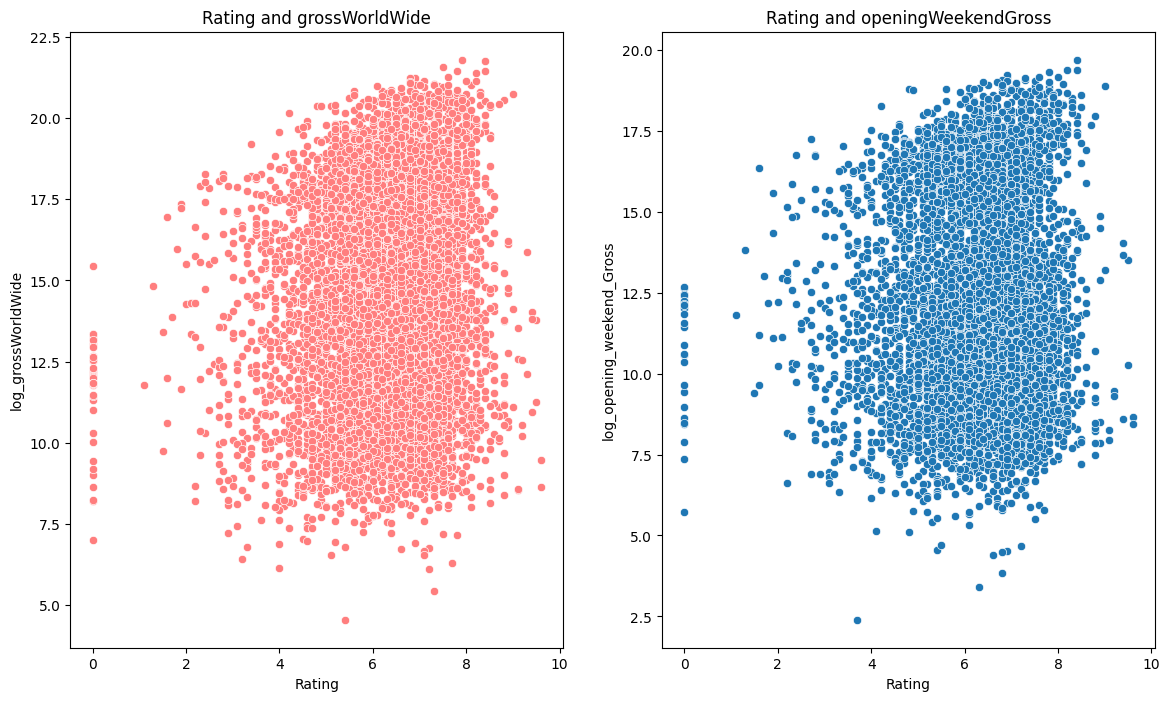

In [ ]:
# 평점 별 영화 분포
plus_analysis['log_grossWorldWide'] = np.log(plus_analysis['grossWorldWide'])
plus_analysis['log_opening_weekend_Gross'] = np.log(plus_analysis['opening_weekend_Gross'])

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.scatterplot(x='Rating',y='log_grossWorldWide', data=plus_analysis, ax=axes[0], c='#FF7E7E')
axes[0].set_title('Rating and grossWorldWide')

sns.scatterplot(x='Rating', y='log_opening_weekend_Gross', data=plus_analysis, ax=axes[1])
axes[1].set_title('Rating and openingWeekendGross')

# for i, row in plus_analysis.iterrows():
#     plt.text(row['Rating'], row['grossWorldWide'], row['Title'], fontsize=8)
plt.show()

너무 많으니까.. 평점별 1개씩만 영화 추려서 보여주기
- 평점별 수익 top1 데이터만

**이때, 평점별 데이터는 0~9까지 10점으로 통일하고, 각 단계에서 가장 높은 (opening Weekend Gross)주말 개봉 기준 수익, 전세계 수익으로 데이터를 가져온다**
- 그린 이유 : 평점과 수익의 상관관계에서 가장 많은 수익을 차지하는 영화가 주말 개봉과 세계 총 수익에서 변동사항이 있을지 궁금

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\152700746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_analysis['Rating_num'] = (plus_analysis['Rating'] // 1).astype(int)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\152700746.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data_holiday = plus_analysis.groupby('Rating_num').apply(lambda x: x.nlargest(1, 'opening_weekend_Gross'))[['Title', 'Rating_num', 'opening_weekend_G

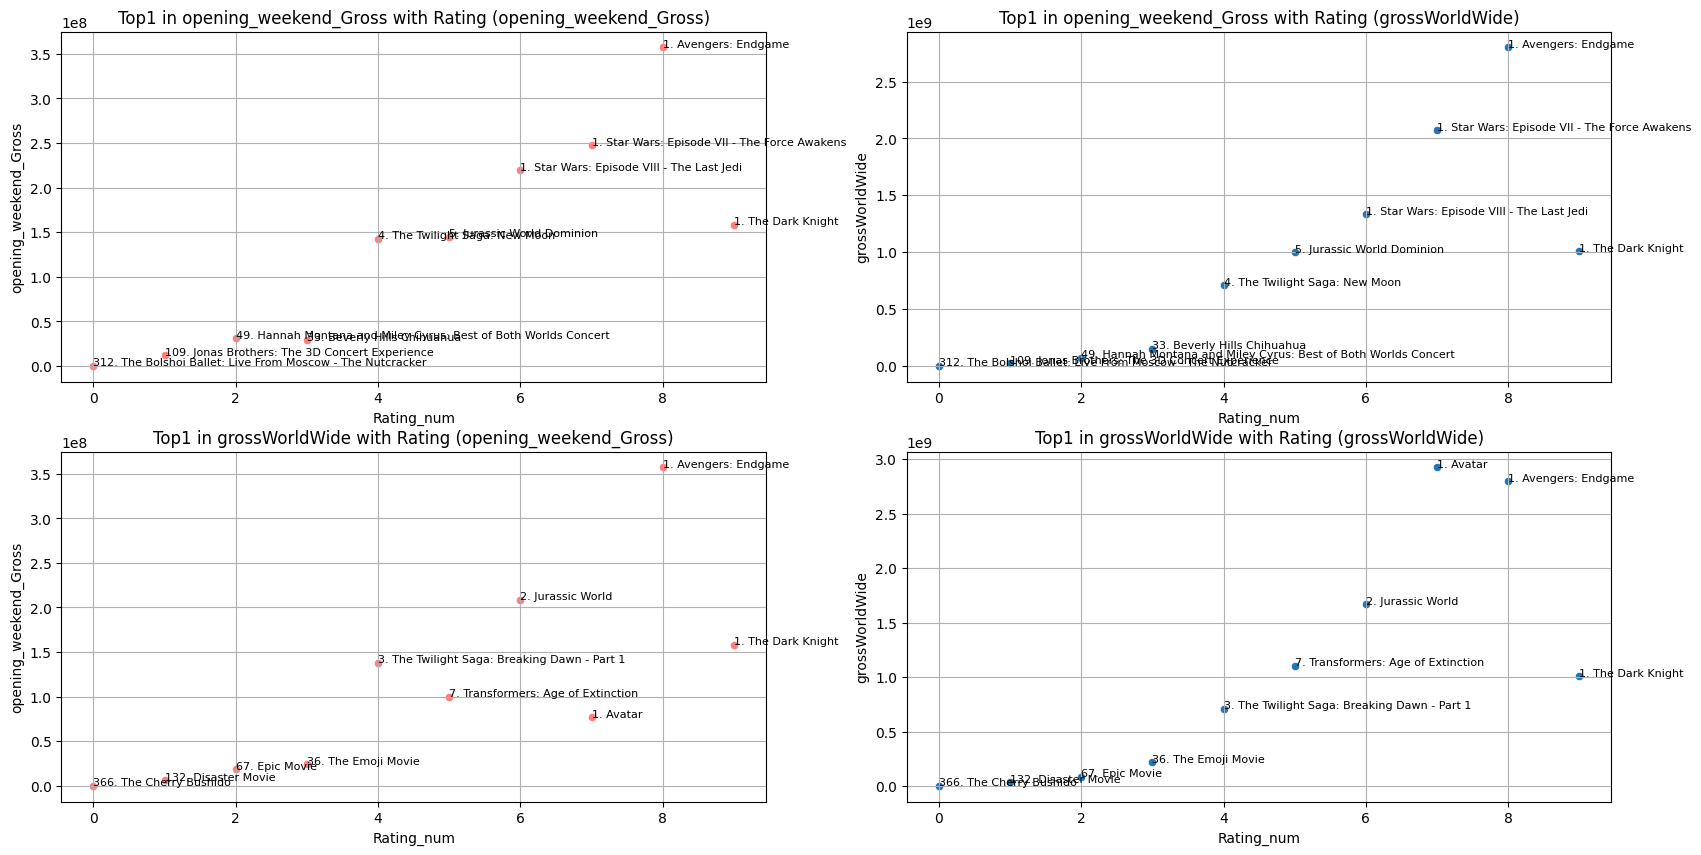

In [ ]:
plus_analysis['Rating_num'] = (plus_analysis['Rating'] // 1).astype(int)
filtered_data_holiday = plus_analysis.groupby('Rating_num').apply(lambda x: x.nlargest(1, 'opening_weekend_Gross'))[['Title', 'Rating_num', 'opening_weekend_Gross', 'grossWorldWide']].reset_index(drop=True)
filtered_data_world_wide = plus_analysis.groupby('Rating_num').apply(lambda x: x.nlargest(1, 'grossWorldWide'))[['Title', 'Rating_num', 'opening_weekend_Gross', 'grossWorldWide']].reset_index(drop=True)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.scatterplot(x='Rating_num',y='opening_weekend_Gross', data=filtered_data_holiday, ax=axes[0][0], c='#FF7E7E')
axes[0][0].set_title('Top1 in opening_weekend_Gross with Rating (opening_weekend_Gross)')

sns.scatterplot(x='Rating_num', y='grossWorldWide', data=filtered_data_holiday, ax=axes[0][1])
axes[0][1].set_title('Top1 in opening_weekend_Gross with Rating (grossWorldWide)')

sns.scatterplot(x='Rating_num', y='opening_weekend_Gross', data=filtered_data_world_wide, ax=axes[1][0], c='#FF7E7E')
axes[1][0].set_title('Top1 in grossWorldWide with Rating (opening_weekend_Gross)')

sns.scatterplot(x='Rating_num', y='grossWorldWide', data=filtered_data_world_wide, ax=axes[1][1])
axes[1][1].set_title('Top1 in grossWorldWide with Rating (grossWorldWide)')


for i, row in filtered_data_holiday.iterrows():
    axes[0][0].text(row['Rating_num'], row['opening_weekend_Gross'], row['Title'], fontsize=8)
    axes[0][1].text(row['Rating_num'], row['grossWorldWide'], row['Title'], fontsize=8)

for i, row in filtered_data_world_wide.iterrows():
    axes[1][0].text(row['Rating_num'], row['opening_weekend_Gross'], row['Title'], fontsize=8)
    axes[1][1].text(row['Rating_num'], row['grossWorldWide'], row['Title'], fontsize=8)

axes[0][0].grid()
axes[0][1].grid()
axes[1][0].grid()
axes[1][1].grid()
    
plt.show()

**[추가 분석]**
- Q: 주말 개봉 수익이 있는 영화는 과연 전세계 총 수입이 얼마나 높을까? (주말 개봉 수익이 0인것 제외)

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


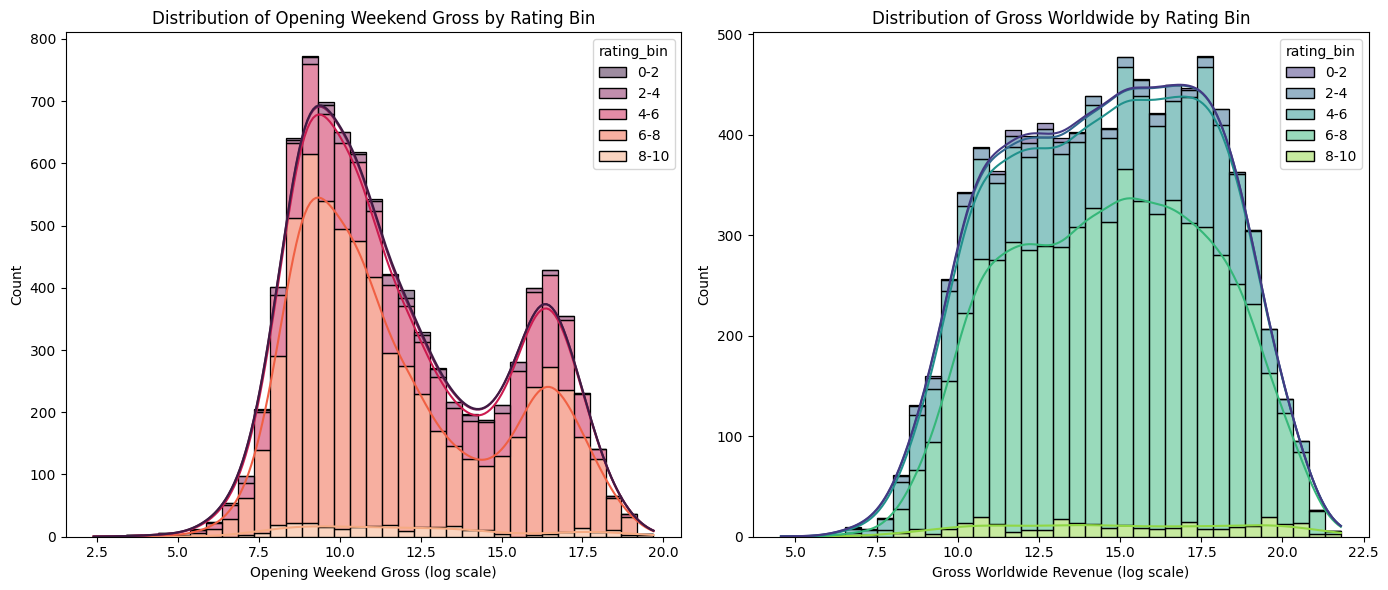

In [ ]:
plus_analysis = plus_analysis[plus_analysis['opening_weekend_Gross'] > 0]

bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
plus_analysis['rating_bin'] = pd.cut(plus_analysis['Rating'], bins=bins, labels=labels, right=False)

plus_analysis['grossWorldWide'] = np.log(plus_analysis['grossWorldWide'])
plus_analysis['opening_weekend_Gross'] = np.log(plus_analysis['opening_weekend_Gross'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=plus_analysis, x='opening_weekend_Gross', hue='rating_bin', kde=True, multiple="stack", palette='rocket', ax=axes[0])
axes[0].set_title('Distribution of Opening Weekend Gross by Rating Bin')
axes[0].set_xlabel('Opening Weekend Gross (log scale)')
axes[0].set_ylabel('Count')

sns.histplot(data=plus_analysis, x='grossWorldWide', hue='rating_bin', kde=True, multiple="stack", palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Gross Worldwide by Rating Bin')
axes[1].set_xlabel('Gross Worldwide Revenue (log scale)')
axes[1].set_ylabel('Count')

# 그래프 보여주기
plt.tight_layout()
plt.show()


### 4. 상 수상 여부와 수익

- oscar and nominations

- oscars: n개 부문 수상
- nominations: n개 부문에 후보로 오름

In [ ]:
df.columns

Index(['Title', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget',
       'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross',
       'directors', 'writers', 'stars', 'genres', 'countries_origin',
       'filming_locations', 'production_companies', 'Languages', 'nominations',
       'oscars', 'Category'],
      dtype='object')

In [ ]:
gg_df = df[['Title', 'Category', 'oscars', 'nominations', 'grossWorldWide']]

(가설)수상이 많을수록 총수익이 높을것이다.

oscars, nominations 상관관계 분석
- oscars와 nominations는 서로 양의 상관관계를 가지고 있다

               oscars  nominations
oscars       1.000000     0.446532
nominations  0.446532     1.000000


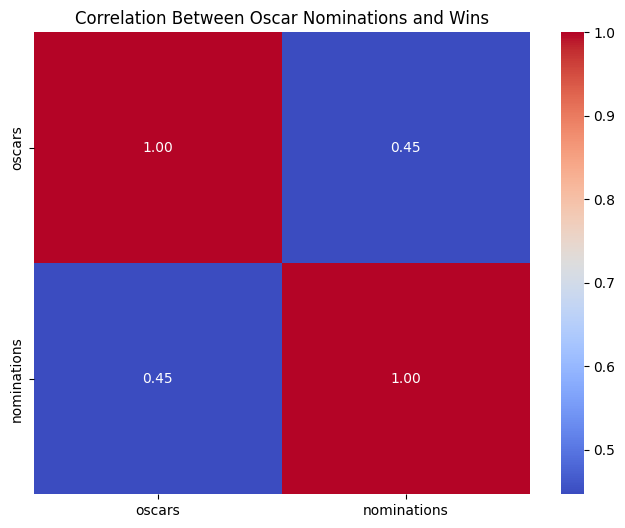

In [ ]:
# 상관계수 계산
correlation = gg_df[['oscars', 'nominations']].corr()
print(correlation)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Oscar Nominations and Wins')
plt.show()

1. oscars, nominations 분포도

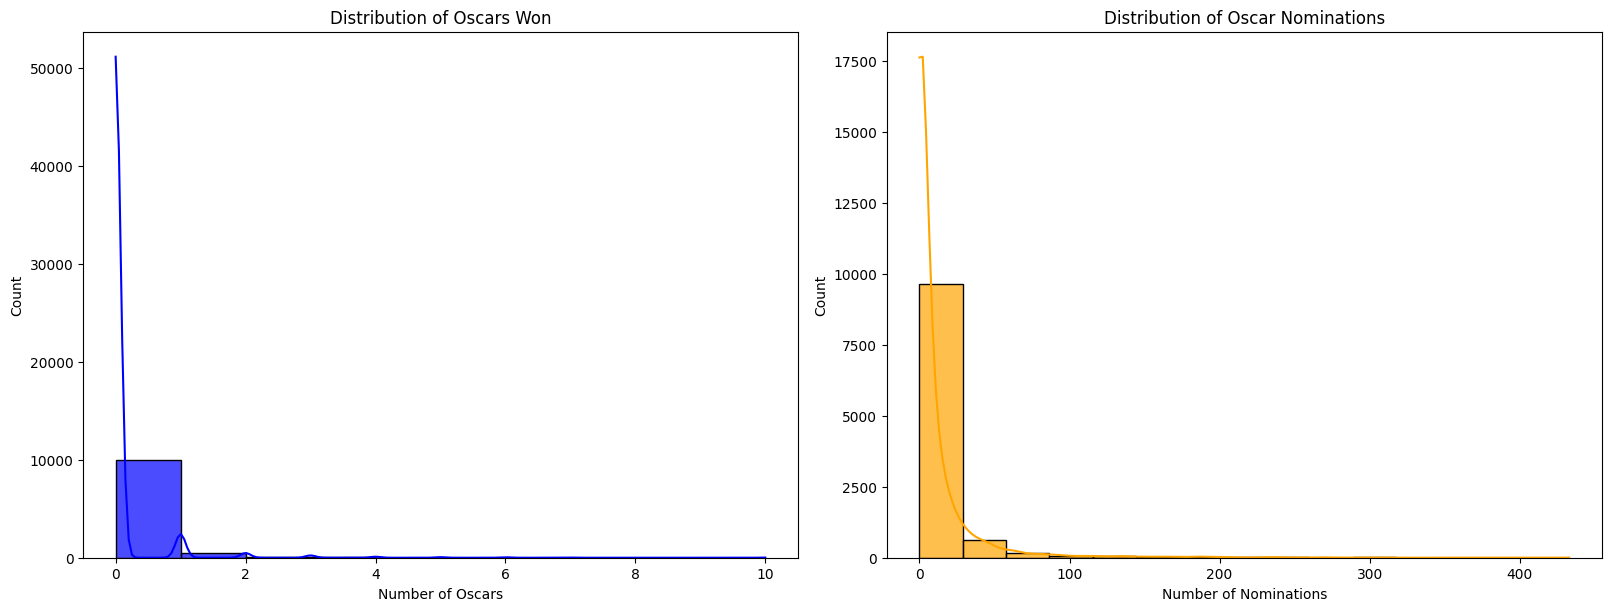

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# 첫 번째 히스토그램: Oscars 분포
sns.histplot(data=gg_df, x='oscars', bins=10, kde=True, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Oscars Won')
axes[0].set_xlabel('Number of Oscars')
axes[0].set_ylabel('Count')

# 두 번째 히스토그램: Nominations 분포
sns.histplot(data=gg_df, x='nominations', bins=15, kde=True, color='orange', alpha=0.7, ax=axes[1])
axes[1].set_title('Distribution of Oscar Nominations')
axes[1].set_xlabel('Number of Nominations')
axes[1].set_ylabel('Count')

# 그래프 표시
plt.show()

**종합해석**
- 아카데미상은 영화 산업에서 매우 중요한 역할을 하지만, 수상은 매우 어렵고 경쟁적임
- 대부분의 영화는 소수의 아카데미상을 수상하거나 노미네이트되며, 극소수의 영화만이 다수의 상을 받음
- 실제로 수상하는게 노미네이트 되는 것보다 실제로 훨씬 어렵다는 것을 확인할 수 있음

2. oscars와 WorldWide Gross / Nominations와 WorldWide Gross
- **oscars & WorldWide Gross**: 수상부문이 많을수록 평균 전 세계 수익이 증가하는 경향 확인 -> 아카데미 수상이 영화의 흥행에 긍정적인 영향을 미칠 수 있다.
- **nominations & WorldWide Gross**: 후보 지명 횟수가 많아질수록 평균 전 세계 수익이 증가하는 패턴이 보일 수 있다 -> 후보 지명이 영화의 주목도를 높여 흥행에 영향을 줄 가능성을 시사

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3559623653.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=oscar_gross, x='oscars', y='grossWorldWide', palette='viridis', ax=axes[0])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\3559623653.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nomination_gross, x='nominations', y='grossWorldWide', palette='rocket', ax=axes[1])


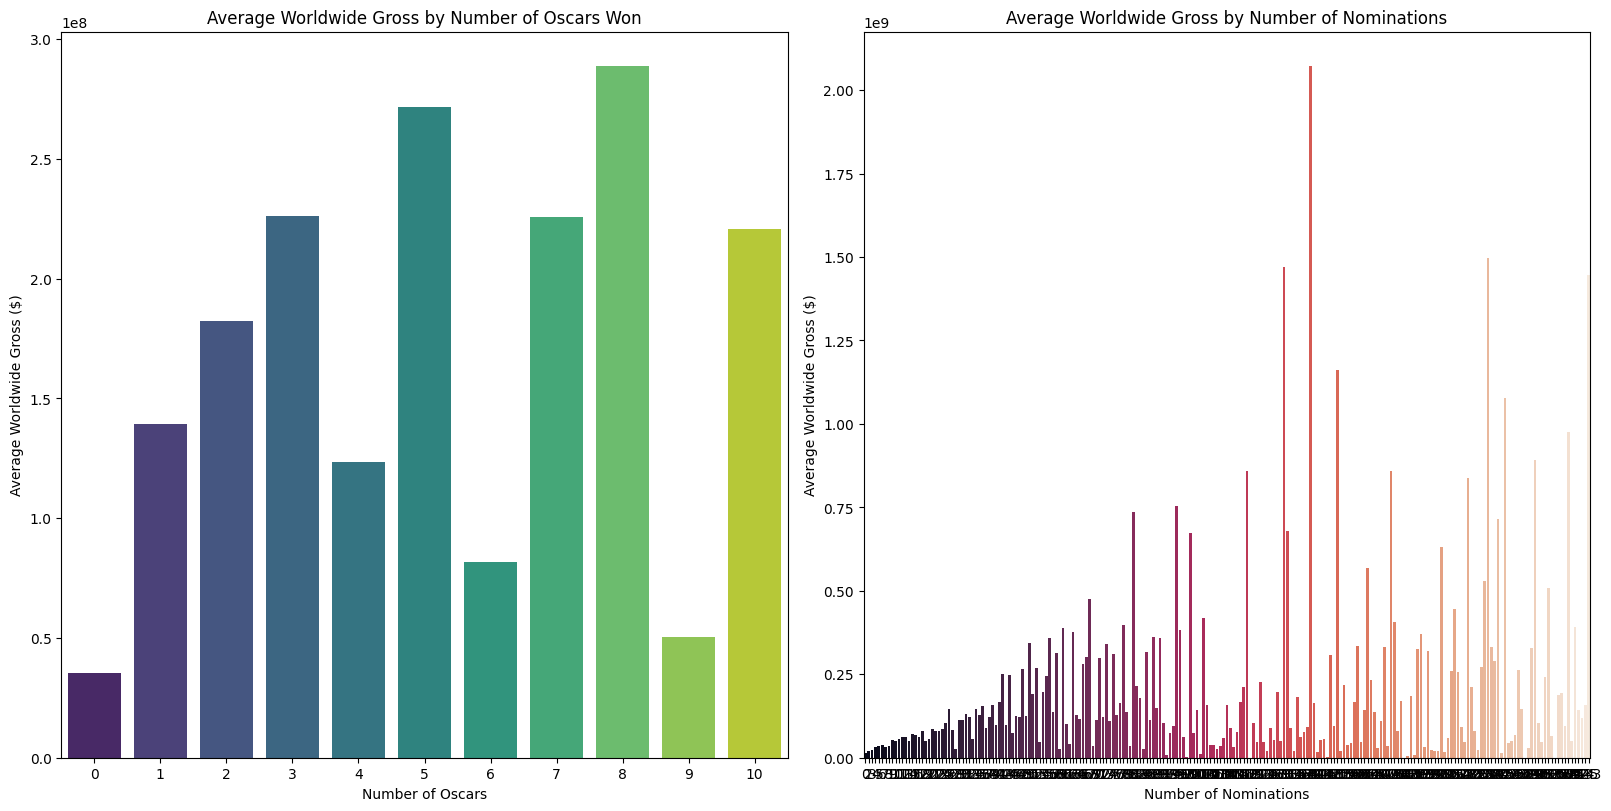

In [ ]:
# Oscars별 평균 전 세계 수익
oscar_gross = gg_df.groupby('oscars')['grossWorldWide'].mean().reset_index()
# Nominations별 평균 전 세계 수익
nomination_gross = gg_df.groupby('nominations')['grossWorldWide'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)
sns.barplot(data=oscar_gross, x='oscars', y='grossWorldWide', palette='viridis', ax=axes[0])
axes[0].set_title('Average Worldwide Gross by Number of Oscars Won')
axes[0].set_xlabel('Number of Oscars')
axes[0].set_ylabel('Average Worldwide Gross ($)')

sns.barplot(data=nomination_gross, x='nominations', y='grossWorldWide', palette='rocket', ax=axes[1])
axes[1].set_title('Average Worldwide Gross by Number of Nominations')
axes[1].set_xlabel('Number of Nominations')
axes[1].set_ylabel('Average Worldwide Gross ($)')

plt.show()

**종합 해석**
1. 오스카 수상 횟수와 전 세계 총 수입의 관계
- x축: 오스카상 n 부문 수상
- y축: 전세계 총 수입


-> 오스카 수상은 영화의 흥행에 긍정적인 요인이다.


-> 오스카 수상 0 부문 수상과 비교했을 때, 1부문이라도 수상한 영화의 총수입이 더 높음

2. 수상 후보 횟수와 전세계 총 수입의 관계
- x축: 오스카 후보 횟수
- y축: 전세계 총 수입
-> 수상 횟수 그래프보다 분산이 더 큼

= 노미네이트 횟수가 많다고 해서 반드시 많은 수입을 올리는 것이 아니고, 노미네이트 횟수가 매우 많은 영화 중에서도 전 세계 총 수입이 상대적으로 낮은 경우 존재

-> 수상 후보에 오르는 것은 영화의 흥행에 긍정적인 영향을 미치는 것으로 해석될 수 있지만, 수상만큼 강력한 상관관계는 없다.
수상 후보는 영화의 질을 인정받는 다는 점에서 중요하지만 흥행 성공을 보장하지는 않는다.

3. oscar, nomination을 고려한 산점도

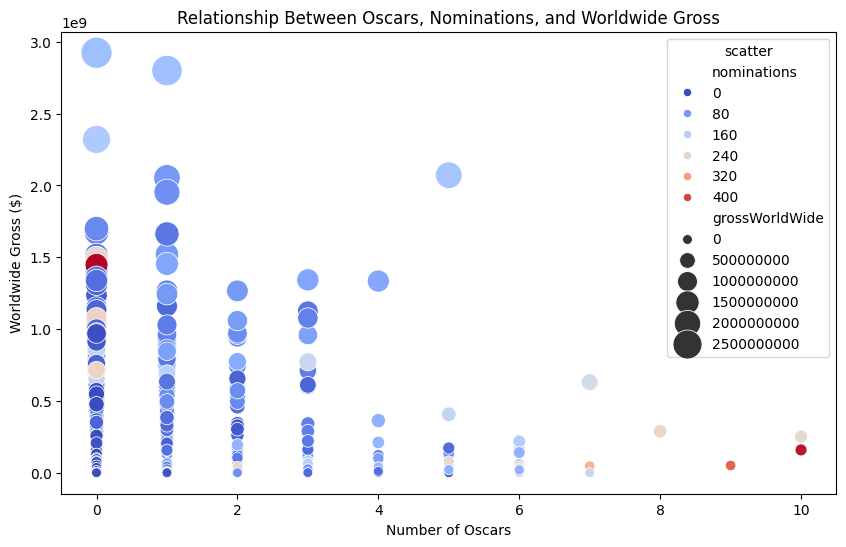

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gg_df, x='oscars', y='grossWorldWide', hue='nominations', size='grossWorldWide', palette='coolwarm', sizes=(50, 500))
plt.title('Relationship Between Oscars, Nominations, and Worldwide Gross')
plt.xlabel('Number of Oscars')
plt.ylabel('Worldwide Gross ($)')
plt.legend(title='scatter')
plt.show()

**종합해석**
각 점: 하나의 영화  
점의 크기: 전 세계 수입  
- 클수록 전 세계 수입이 높음
색깔: 노미네이션 횟수  

흠..생각보다 수상을 하지 않은 영화중에서도 수입이 높은 경우가 있습니다....

**[추가 분석]**  
- oscar 수상을 다수 한 영화 장르(Category 이용) 분석  

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\2502704617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_oscars, x='oscars', y='Category', palette=custom_palette)


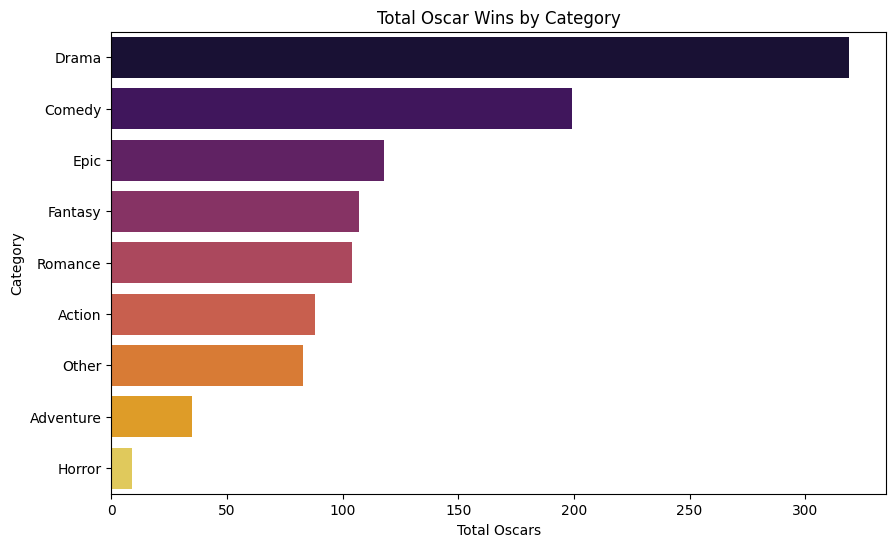

In [ ]:
# 데이터를 그룹화하여 각 Category별 Oscars 수상의 합 계산
category_oscars = df.groupby('Category')['oscars'].sum().reset_index()

# Oscars 수상의 내림차순으로 정렬
category_oscars = category_oscars.sort_values(by='oscars', ascending=False)
custom_palette = sns.color_palette("inferno", len(category_oscars))

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=category_oscars, x='oscars', y='Category', palette=custom_palette)
plt.title('Total Oscar Wins by Category')
plt.xlabel('Total Oscars')
plt.ylabel('Category')
plt.show()

**Drama**에서 oscars 수상작이 많습니다.

Drama에서 가장 많이 oscars 많이 수상한 영화 Top5 (데이터 프레임 확인)

In [ ]:
drama_top5 = gg_df[gg_df['Category'] == 'Drama']
drama_top5 = drama_top5.sort_values(by='oscars', ascending=False).head(5).reset_index()
drama_top5.drop(columns=['index'], inplace=True)
drama_top5

,Title,Category,oscars,nominations,grossWorldWide
0,17. American Hustle,Drama,10,227,251171807.0
1,13. True Grit,Drama,10,169,252278285.0
2,58. The Fabelmans,Drama,7,297,45620703.0
3,87. Tár,Drama,6,274,29048571.0
4,120. 127 Hours,Drama,6,150,60738797.0


**[추가분석2]**
- grossWorldWide(총 세계 수입)이 가장 많은 장르

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20120\2389591078.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_money, x='grossWorldWide', y='Category', palette=custom_palette)


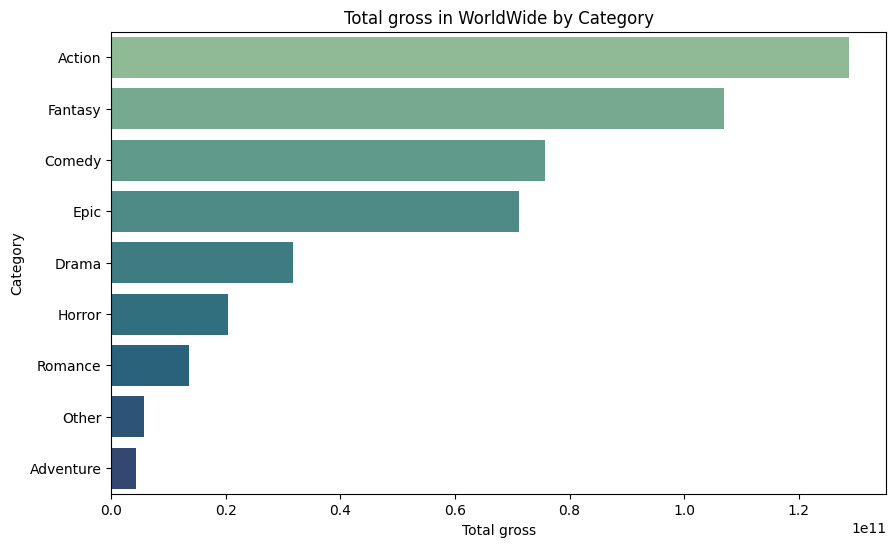

In [ ]:
# 데이터를 그룹화하여 각 Category별 총 세계 수입의 합 계산
category_money = df.groupby('Category')['grossWorldWide'].sum().reset_index()

# Oscars 수상의 내림차순으로 정렬
category_money = category_money.sort_values(by='grossWorldWide', ascending=False)
custom_palette = sns.color_palette("crest", len(category_money)) # cubehelix

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=category_money, x='grossWorldWide', y='Category', palette=custom_palette)
plt.title('Total gross in WorldWide by Category')
plt.xlabel('Total gross')
plt.ylabel('Category')
plt.show()

Action에서 가장 많이 oscars 많이 수상한 영화 Top5 (데이터 프레임 확인)

In [ ]:
action_top5 = gg_df[gg_df['Category'] == 'Action']
action_top5 = action_top5.sort_values(by='oscars', ascending=False).head(5).reset_index()
action_top5.drop(columns=['index'], inplace=True)
action_top5

,Title,Category,oscars,nominations,grossWorldWide
0,32. Captain Phillips,Action,6,154,2.187918e+08
1,25. News of the World,Action,4,80,1.266832e+07
2,2. Transformers: Dark of the Moon,Action,3,42,1.123794e+09
3,57. Sicario,Action,3,157,8.499745e+07
4,28. Baby Driver,Action,3,66,2.269451e+08


두 데이터 프레임 동시에 확인

In [ ]:
pd.concat([drama_top5, action_top5], axis=1)

,Title,Category,oscars,nominations,grossWorldWide,Title,Category,oscars,nominations,grossWorldWide
0,17. American Hustle,Drama,10,227,251171807.0,32. Captain Phillips,Action,6,154,2.187918e+08
1,13. True Grit,Drama,10,169,252278285.0,25. News of the World,Action,4,80,1.266832e+07
2,58. The Fabelmans,Drama,7,297,45620703.0,2. Transformers: Dark of the Moon,Action,3,42,1.123794e+09
3,87. Tár,Drama,6,274,29048571.0,57. Sicario,Action,3,157,8.499745e+07
4,120. 127 Hours,Drama,6,150,60738797.0,28. Baby Driver,Action,3,66,2.269451e+08


## **페르소나 4: Emily Park**
- **직업**: 영화 제작사 리서치 분석가 (Data Analyst)
- **목표**:
    - 데이터 기반으로 신흥 시장 및 관객 니즈를 파악하여 새로운 영화 프로젝트의 성공 가능성을 높임.
    - 과거 흥행 패턴을 분석해 제작사 내부에서 전략적인 의사결정을 지원.
- **관심사**:
    - 신흥 시장에서의 흥행 가능성이 높은 영화 장르 및 요소 분석
    - 낮은 제작비로 높은 수익을 낼 수 있는 영화 요소 탐구
    - 지역별로 효과적인 배급 및 마케팅 전략 수립
    - 데이터를 활용하여 영화 제작사 내부 보고서 작성 및 시각화

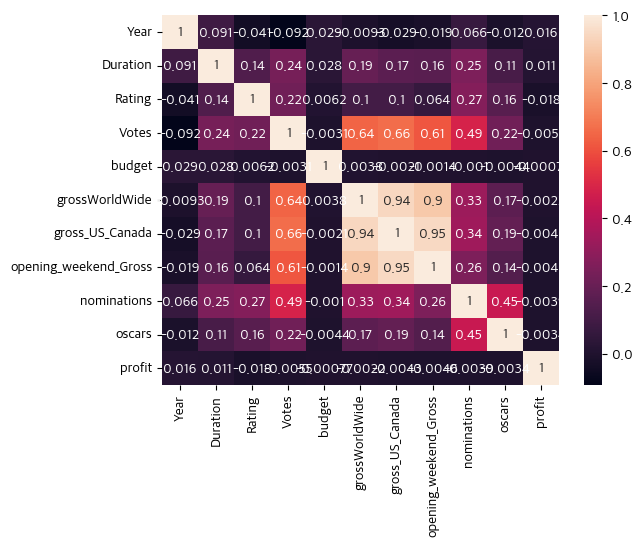

In [11]:
# - 제작비 대비 흥행 성공 가능성이 높은 제작 요소(장르, 감독, 배우)는 무엇인가요?
df['profit'] = df['grossWorldWide'] / df['budget']
corr_matrix = df.corr(numeric_only=True) # 상관계수 행렬
corr_matrix

sns.heatmap(corr_matrix, annot=True)
plt.show()

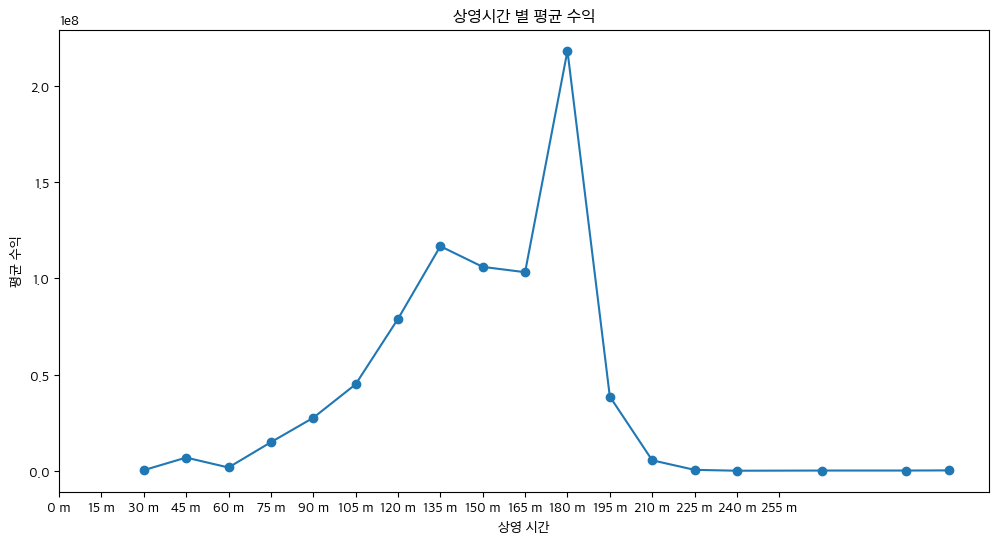

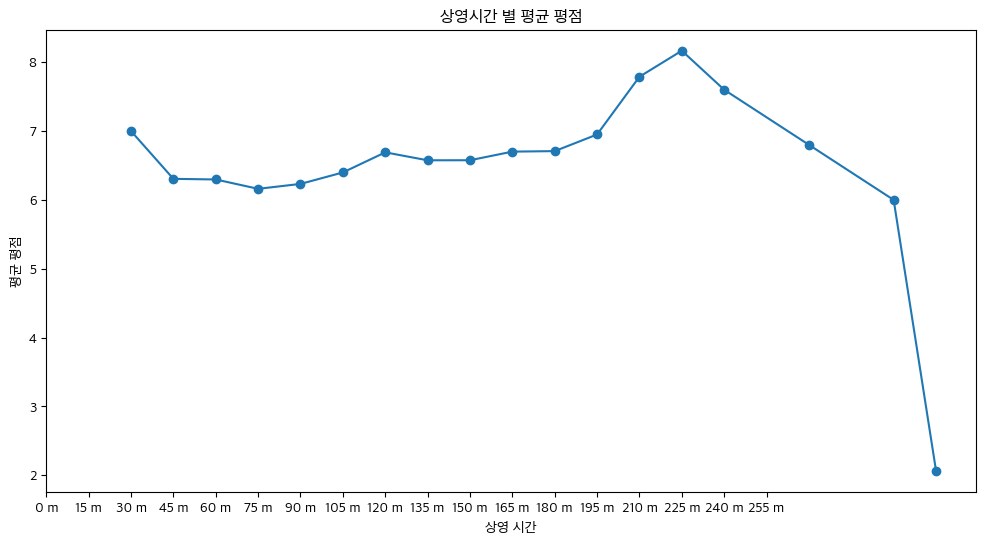

In [12]:
#     - 상영 시간이 수익률에 미치는 영향을 박스플롯으로 시각화
df['runtime'] = (df['Duration'] // 15)

# 상영시간별 평균 수익
df_runtime_gww_mean = df.groupby('runtime')['grossWorldWide'].mean()
plt.figure(figsize=(12, 6))
plt.plot(df_runtime_gww_mean, marker='o')
plt.xlabel('상영 시간')
plt.ylabel('평균 수익')
plt.xticks(ticks=np.arange(0, 18), labels=[f'{i*15} m' for i in range(18)])
plt.title('상영시간 별 평균 수익')
plt.show()

# 상영시간별 평균 평점
df_runtime_rating_mean = df.groupby('runtime')['Rating'].mean()
plt.figure(figsize=(12, 6))
plt.plot(df_runtime_rating_mean, marker='o')
plt.xlabel('상영 시간')
plt.ylabel('평균 평점')
plt.xticks(ticks=np.arange(0, 18), labels=[f'{i*15} m' for i in range(18)])
plt.title('상영시간 별 평균 평점')
plt.show()

In [13]:
def barplot_graph(title, data, xlabel='국가', ylabel='수익'):
    plt.figure(figsize=(10, 5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency))
    plt.xticks(rotation=45)
    plt.tight_layout()  # 레이아웃 조정
    sns.barplot(x=data.index, y=data.values, palette='coolwarm', hue=data.index)  # 막대 위치 고정)
    plt.title(title)
    plt.show()

In [14]:
def get_mean_gross(df:pd.DataFrame, col:str, xlabel:str):
    df_temp = df[col].str.replace('[', '').str.replace(']', '').str.replace("'", '').str.get_dummies(sep=', ')
    gross_all = df_temp.mul(df['grossWorldWide'], axis=0).sum()
    gross_mean = df_temp.mul(df['grossWorldWide'], axis=0).sum() / df_temp.sum()
    barplot_graph(f'{xlabel}별 영화 총수익 상위 10', gross_all.sort_values(ascending=False).head(10), xlabel=xlabel)
    barplot_graph(f'{xlabel}별 영화 평균 수익 상위 10', gross_mean.sort_values(ascending=False).head(10), xlabel=xlabel)

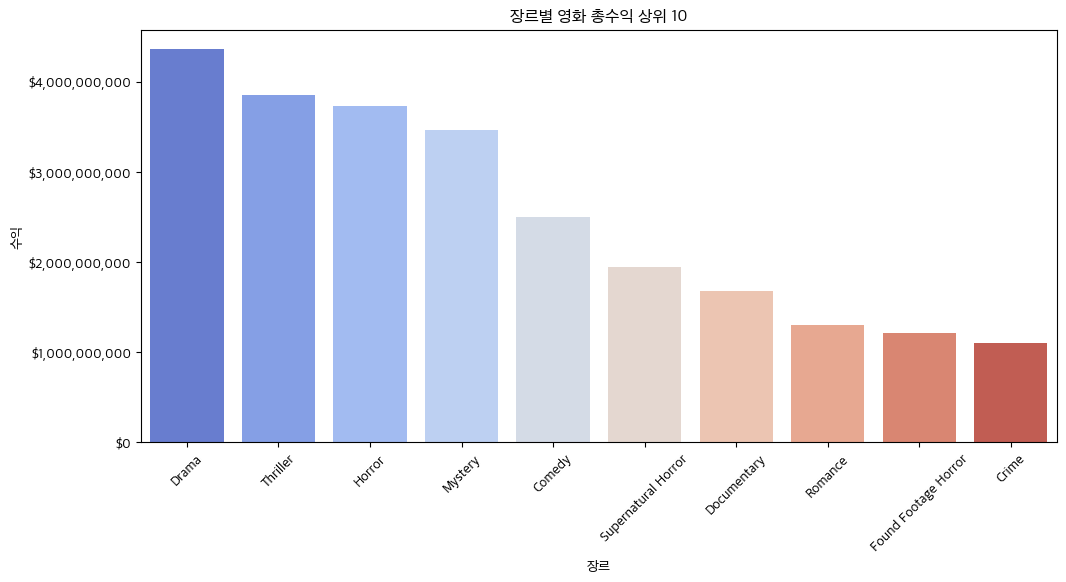

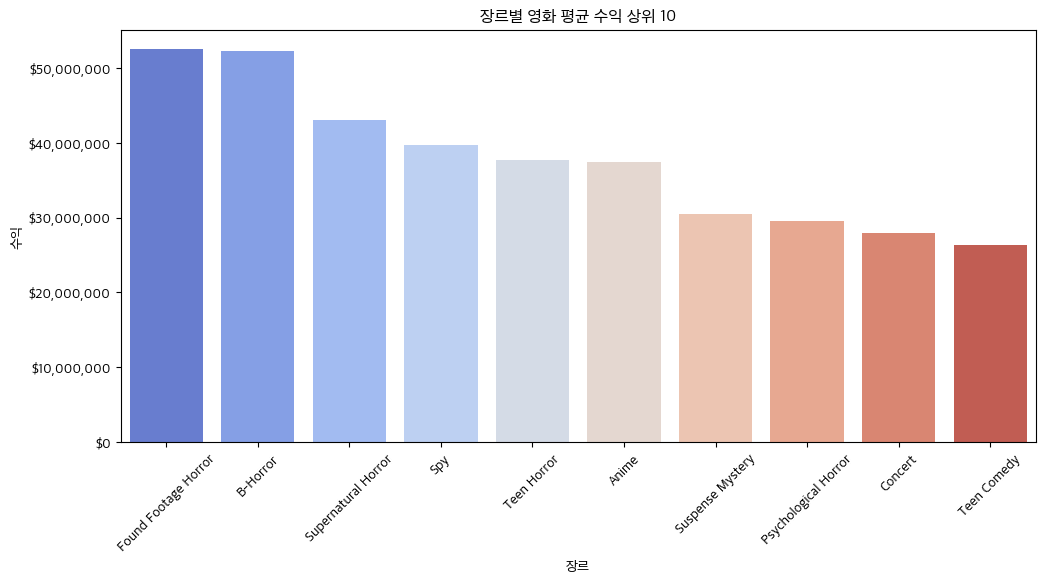

In [15]:
# 저예산 영화중 수익이 높은 영화의 장르
low_budget = df[df['budget'] <= 5e6]
get_mean_gross(low_budget, 'genres', xlabel='장르')

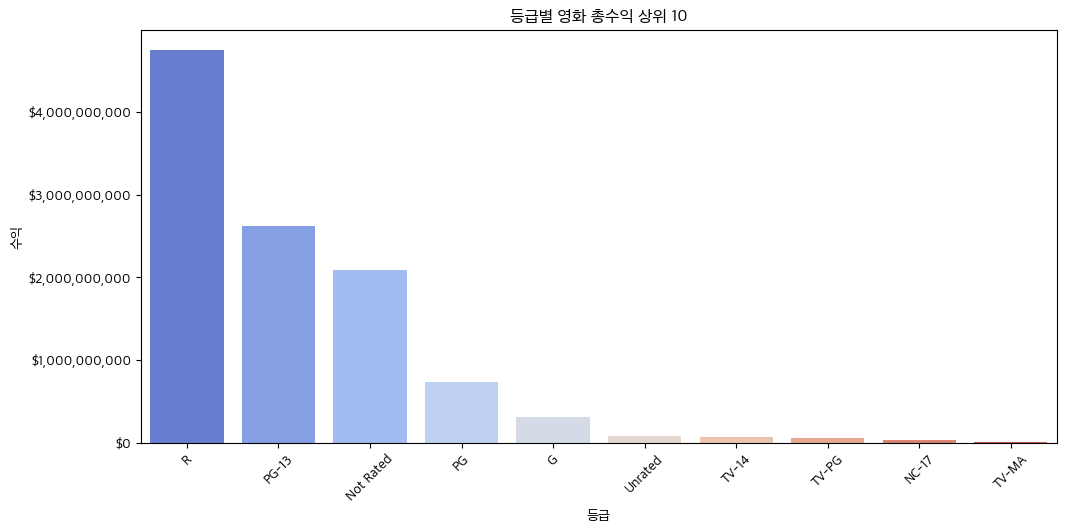

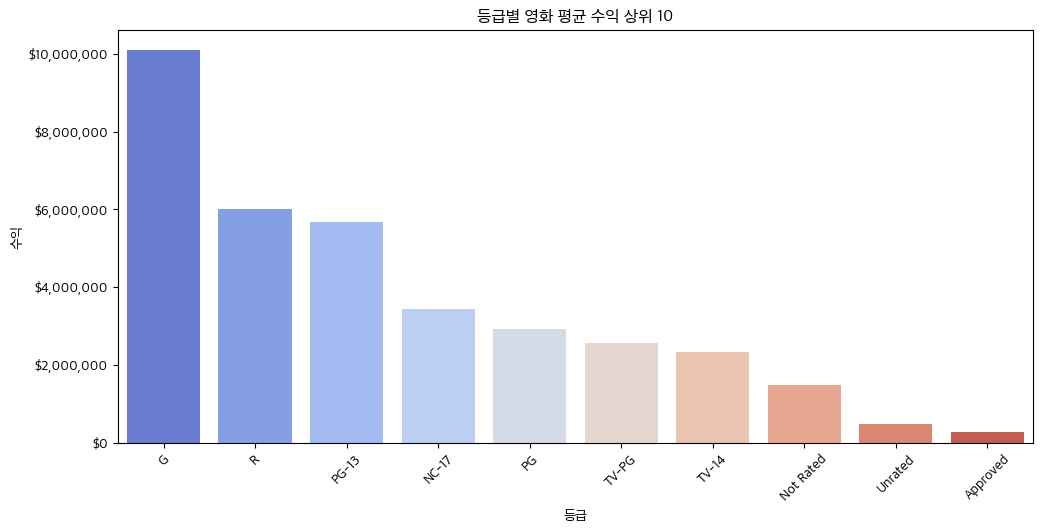

In [16]:
# 저예산 영화중 수익이 높은 영화의 장르
low_budget = df[df['budget'] <= 5e6]
get_mean_gross(low_budget, 'MPA', xlabel='등급')